# Análisis Exploratorio

En este notebook realizamos un análisis exploratorio de los datos de CGM y de la información de pacientes.

## 0. Montar Google Drive

Este notebook fue creado y ejecutado en la plataforma Google Colab. Para cargar los datos, se montó Google Drive en el entorno del notebook.

In [101]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 1. Carga de Los Datos

### 1.1. Información General de Los Pacientes

In [102]:
import pandas as pd

# Cargamos la información de pacientes desde CSV
ruta_csv = '/content/drive/My Drive/TFG/Datos/Info_Pacientes.csv'
pacientes_df = pd.read_csv(ruta_csv)

In [103]:
print("\nEjemplo de registros de pacientes:")
display(pacientes_df.head(5))


Ejemplo de registros de pacientes:


,Record ID,Fecha de firma de consentimiento informado,Año de inclusión,Año de nacimiento,Edad al momento de ser incluido en el proyecto,Sexo,Año de diagnostico de diabetes mellitus,Tiempo de evolución de la DM,Edad de diagnostico de la DM,Tipo de diabetes,...,¿Existen complicaciones microvasculares?,Tipo de complicaciones microvasculares (choice=Afectación ocular (RD y/o edema macular)),Tipo de complicaciones microvasculares (choice=PNP),Tipo de complicaciones microvasculares (choice=Nefropatía diabética),¿Existen complicaciones macrovasculares?,Tipo de complicaciones macrovasculares (choice=Infarto agudo de miocardio (IAM)),Tipo de complicaciones macrovasculares (choice=Ictus),Tipo de complicaciones macrovasculares (choice=Accidente isquémico transitorio (AIT)),"Tipo de complicaciones macrovasculares (choice=Revascularización (coronaria, cerebral o arterias periféricas))",Complete?
0,811-1,2024-02-08,2024,2000,24,Mujer,2017,7,17,Diabetes mellitus tipo 1,...,No disponible,Unchecked,Unchecked,Unchecked,No disponible,Unchecked,Unchecked,Unchecked,Unchecked,Complete
1,811-2,2024-02-08,2024,1972,52,Varón,1996,28,24,Diabetes mellitus tipo 1,...,No,Unchecked,Unchecked,Unchecked,No,Unchecked,Unchecked,Unchecked,Unchecked,Complete
2,811-3,2024-02-08,2024,1988,36,Varón,2000,24,12,Diabetes mellitus tipo 1,...,No,Unchecked,Unchecked,Unchecked,No,Unchecked,Unchecked,Unchecked,Unchecked,Complete
3,811-4,2024-02-08,2024,1955,69,Mujer,1982,42,27,Diabetes mellitus tipo 1,...,Sí,Checked,Unchecked,Unchecked,Sí,Unchecked,Unchecked,Unchecked,Checked,Complete
4,811-5,2024-02-08,2024,1985,39,Mujer,2009,15,24,Diabetes mellitus tipo 1,...,No,Unchecked,Unchecked,Unchecked,No,Unchecked,Unchecked,Unchecked,Unchecked,Complete


### 1.2. Información de Los Sensores CGM

In [104]:
import os
import pandas as pd

# Definimos la ruta base donde se encuentran los CSV
ruta_base = '/content/drive/My Drive/TFG/Datos'

# Definimos las columnas de insulina y preparamos los convertidores para comas en valores numéricos
insulina_cols = [
    'Insulina de acción larga (unidades)',
    'Insulina de acción rápida (unidades)'
]
converters = {
    col: lambda x: x.replace(',', '.') if isinstance(x, str) else x
    for col in insulina_cols
}

# Cargamos los datos de cada paciente en un diccionario
datos_pacientes = {}
for i in range(1, 54):
    filename = f'811-{i}.csv'
    filepath = os.path.join(ruta_base, filename)
    try:
        df = pd.read_csv(
            filepath,
            skiprows=2,
            dtype={'Notas': 'str'},
            converters=converters,
            na_values=['', ' ', '  ', '    ']
        )
        datos_pacientes[f'paciente{i}'] = df
    except Exception as e:
        print(f"Error al cargar {filename}: {e}")

# Convertimos las columnas de insulina a tipo numérico para su posterior uso
for key, df in datos_pacientes.items():
    df[insulina_cols] = df[insulina_cols].apply(pd.to_numeric, errors='coerce')
    datos_pacientes[key] = df

In [105]:
# Cambiar valor de la variable 'x' por ID del paciente que se quiera ver dataframe
x = 1
datos_pacientes[f'paciente{x}']

,Dispositivo,Número de serial,Sello de tiempo del dispositivo,Tipo de registro,Historial de glucosa mg/dL,Escaneo de glucosa mg/dL,Insulina de acción rápida no numérica,Insulina de acción rápida (unidades),Alimento no numérico,Carbohidratos (gramos),Carbohidratos (porciones),Insulina de acción larga no numérica,Insulina de acción larga (unidades),Notas,Tira reactiva para glucosa mg/dL,Cuerpos cetónicos mmol/L,Comida e insulina (unidades),Insulina de corrección (unidades),Insulina del cambio de usuario (unidades)
0,NaN,AARSXG,02/06/2023 11:58,4,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,AARSXG,02/06/2023 18:35,4,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,AARSXG,03/06/2023 11:05,4,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,AARSXG,03/06/2023 16:13,4,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,AARSXG,14/06/2023 8:33,4,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60828,FreeStyle LibreLink,B4D841CF-FF48-444C-8C0A-B79410D30F54,24/02/2024 1:00,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60829,FreeStyle LibreLink,B4D841CF-FF48-444C-8C0A-B79410D30F54,24/02/2024 18:57,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60830,FreeStyle LibreLink,B4D841CF-FF48-444C-8C0A-B79410D30F54,25/02/2024 21:06,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60831,FreeStyle LibreLink,B4D841CF-FF48-444C-8C0A-B79410D30F54,27/02/2024 16:27,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 2. Análisis Exploratorio

### 2.1. Análisis de la Información General de Los Pacientes

#### 2.1.1. Análisis Estadístico Descriptivo

In [106]:
# Mostramos la estructura y un muestreo de los datos
print("Estructura del DataFrame de pacientes:")
pacientes_df.info()

Estructura del DataFrame de pacientes:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 35 columns):
 #   Column                                                                                                          Non-Null Count  Dtype  
---  ------                                                                                                          --------------  -----  
 0   Record ID                                                                                                       53 non-null     object 
 1   Fecha de firma de consentimiento informado                                                                      53 non-null     object 
 2   Año de inclusión                                                                                                53 non-null     int64  
 3   Año de nacimiento                                                                                               53 non-null     int64  
 4   Edad al

In [107]:
# Listamos las columnas y contamos valores únicos
columnas = pacientes_df.columns.tolist()
print(f"\nColumnas disponibles ({len(columnas)}): {columnas}")

for columna in columnas:
    valores = pacientes_df[columna].dropna().unique()
    print(f"\nColumna '{columna}' – {len(valores)} valores únicos:")
    muestra = valores if len(valores) <= 10 else list(valores[:10]) + ['…']
    print(muestra)


Columnas disponibles (35): ['Record ID', 'Fecha de firma de consentimiento informado', 'Año de inclusión', 'Año de nacimiento', 'Edad al momento de ser incluido en el proyecto', 'Sexo', 'Año de diagnostico de diabetes mellitus', 'Tiempo de evolución de la DM ', 'Edad de diagnostico de la DM', 'Tipo de diabetes', 'Peso actual (kg)', 'Talla (m)', 'IMC', 'Tipo de tratamiento', 'Dosis total de insulina lenta (UI/24h)', 'Dosis total de insulina rápida (UI/24h)', 'Unidades totales de insulina (UI/24h)', 'Unidades totales de insulina por kg de peso (UI/24h/Kg)', 'HbA1c disponible', 'HbA1c valor', 'HbA1c fecha', '¿Hay otra HbA1c disponible?', 'HbA1c valor (segundo valor)', 'HbA1c fecha (fecha de segundo valor)', 'Promedio de hemoglobinas glicadas', '¿Existen complicaciones microvasculares?', 'Tipo de complicaciones microvasculares (choice=Afectación ocular (RD y/o edema macular))', 'Tipo de complicaciones microvasculares (choice=PNP)', 'Tipo de complicaciones microvasculares (choice=Nefropatí

In [108]:
# Resumen estadístico de variables numéricas
resumen_num = pacientes_df.describe()
print("Resumen estadístico de variables numéricas:")
display(resumen_num)


Resumen estadístico de variables numéricas:


,Año de inclusión,Año de nacimiento,Edad al momento de ser incluido en el proyecto,Año de diagnostico de diabetes mellitus,Tiempo de evolución de la DM,Edad de diagnostico de la DM,Peso actual (kg),Talla (m),IMC,Dosis total de insulina lenta (UI/24h),Dosis total de insulina rápida (UI/24h),Unidades totales de insulina (UI/24h),Unidades totales de insulina por kg de peso (UI/24h/Kg),HbA1c valor,HbA1c valor (segundo valor),Promedio de hemoglobinas glicadas
count,53.0,53.000000,53.000000,53.000000,53.000000,53.000000,52.000000,53.000000,52.000000,53.000000,52.000000,52.000000,51.000000,52.000000,50.000000,50.000000
mean,2024.0,1974.981132,49.018868,2000.773585,23.226415,25.792453,77.490385,1.706811,26.842308,30.471698,27.365385,58.038462,0.749824,7.544231,7.584000,7.564000
std,0.0,15.836291,15.836291,10.792878,10.792878,13.718823,13.169011,0.110672,5.256904,17.195263,14.213055,26.804091,0.305741,1.287102,1.219796,1.124996
min,2024.0,1947.000000,21.000000,1972.000000,3.000000,7.000000,50.000000,1.400000,18.400000,9.000000,4.000000,14.000000,0.401107,5.600000,5.600000,5.600000
25%,2024.0,1959.000000,37.000000,1993.000000,16.000000,17.000000,68.775000,1.636000,23.375000,18.000000,17.875000,38.000000,0.535846,6.675000,6.700000,6.700000
50%,2024.0,1976.000000,48.000000,2001.000000,23.000000,23.000000,75.850000,1.730000,25.900000,24.000000,24.000000,50.500000,0.658482,7.300000,7.300000,7.300000
75%,2024.0,1987.000000,65.000000,2008.000000,31.000000,30.000000,86.475000,1.790000,28.575000,40.000000,34.250000,74.250000,0.937755,8.150000,8.275000,8.275000
max,2024.0,2003.000000,77.000000,2021.000000,52.000000,71.000000,110.400000,1.900000,47.700000,72.000000,73.000000,136.000000,1.988304,11.900000,10.900000,10.100000


In [109]:
# Identificamos valores faltantes por columna
faltantes = pacientes_df.isnull().sum()
print("\nValores faltantes por columna:")
display(faltantes)


Valores faltantes por columna:


,0
Record ID,0
Fecha de firma de consentimiento informado,0
Año de inclusión,0
Año de nacimiento,0
Edad al momento de ser incluido en el proyecto,0
Sexo,0
Año de diagnostico de diabetes mellitus,0
Tiempo de evolución de la DM,0
Edad de diagnostico de la DM,0
Tipo de diabetes,0


#### 2.1.2. Visualización y Distribución de Los Datos

In [110]:
edades = pacientes_df['Edad al momento de ser incluido en el proyecto'].dropna()

# Definimos intervalos de 10 en 10 años y calculamos la tabla de frecuencias
intervalos_edad = range(0, 101, 10)
categorias_edad = pd.cut(edades, bins=intervalos_edad, right=False)
tabla_frecuencias = categorias_edad.value_counts().sort_index()
print(tabla_frecuencias)

Edad al momento de ser incluido en el proyecto
[0, 10)       0
[10, 20)      0
[20, 30)      8
[30, 40)      7
[40, 50)     13
[50, 60)      8
[60, 70)     13
[70, 80)      4
[80, 90)      0
[90, 100)     0
Name: count, dtype: int64


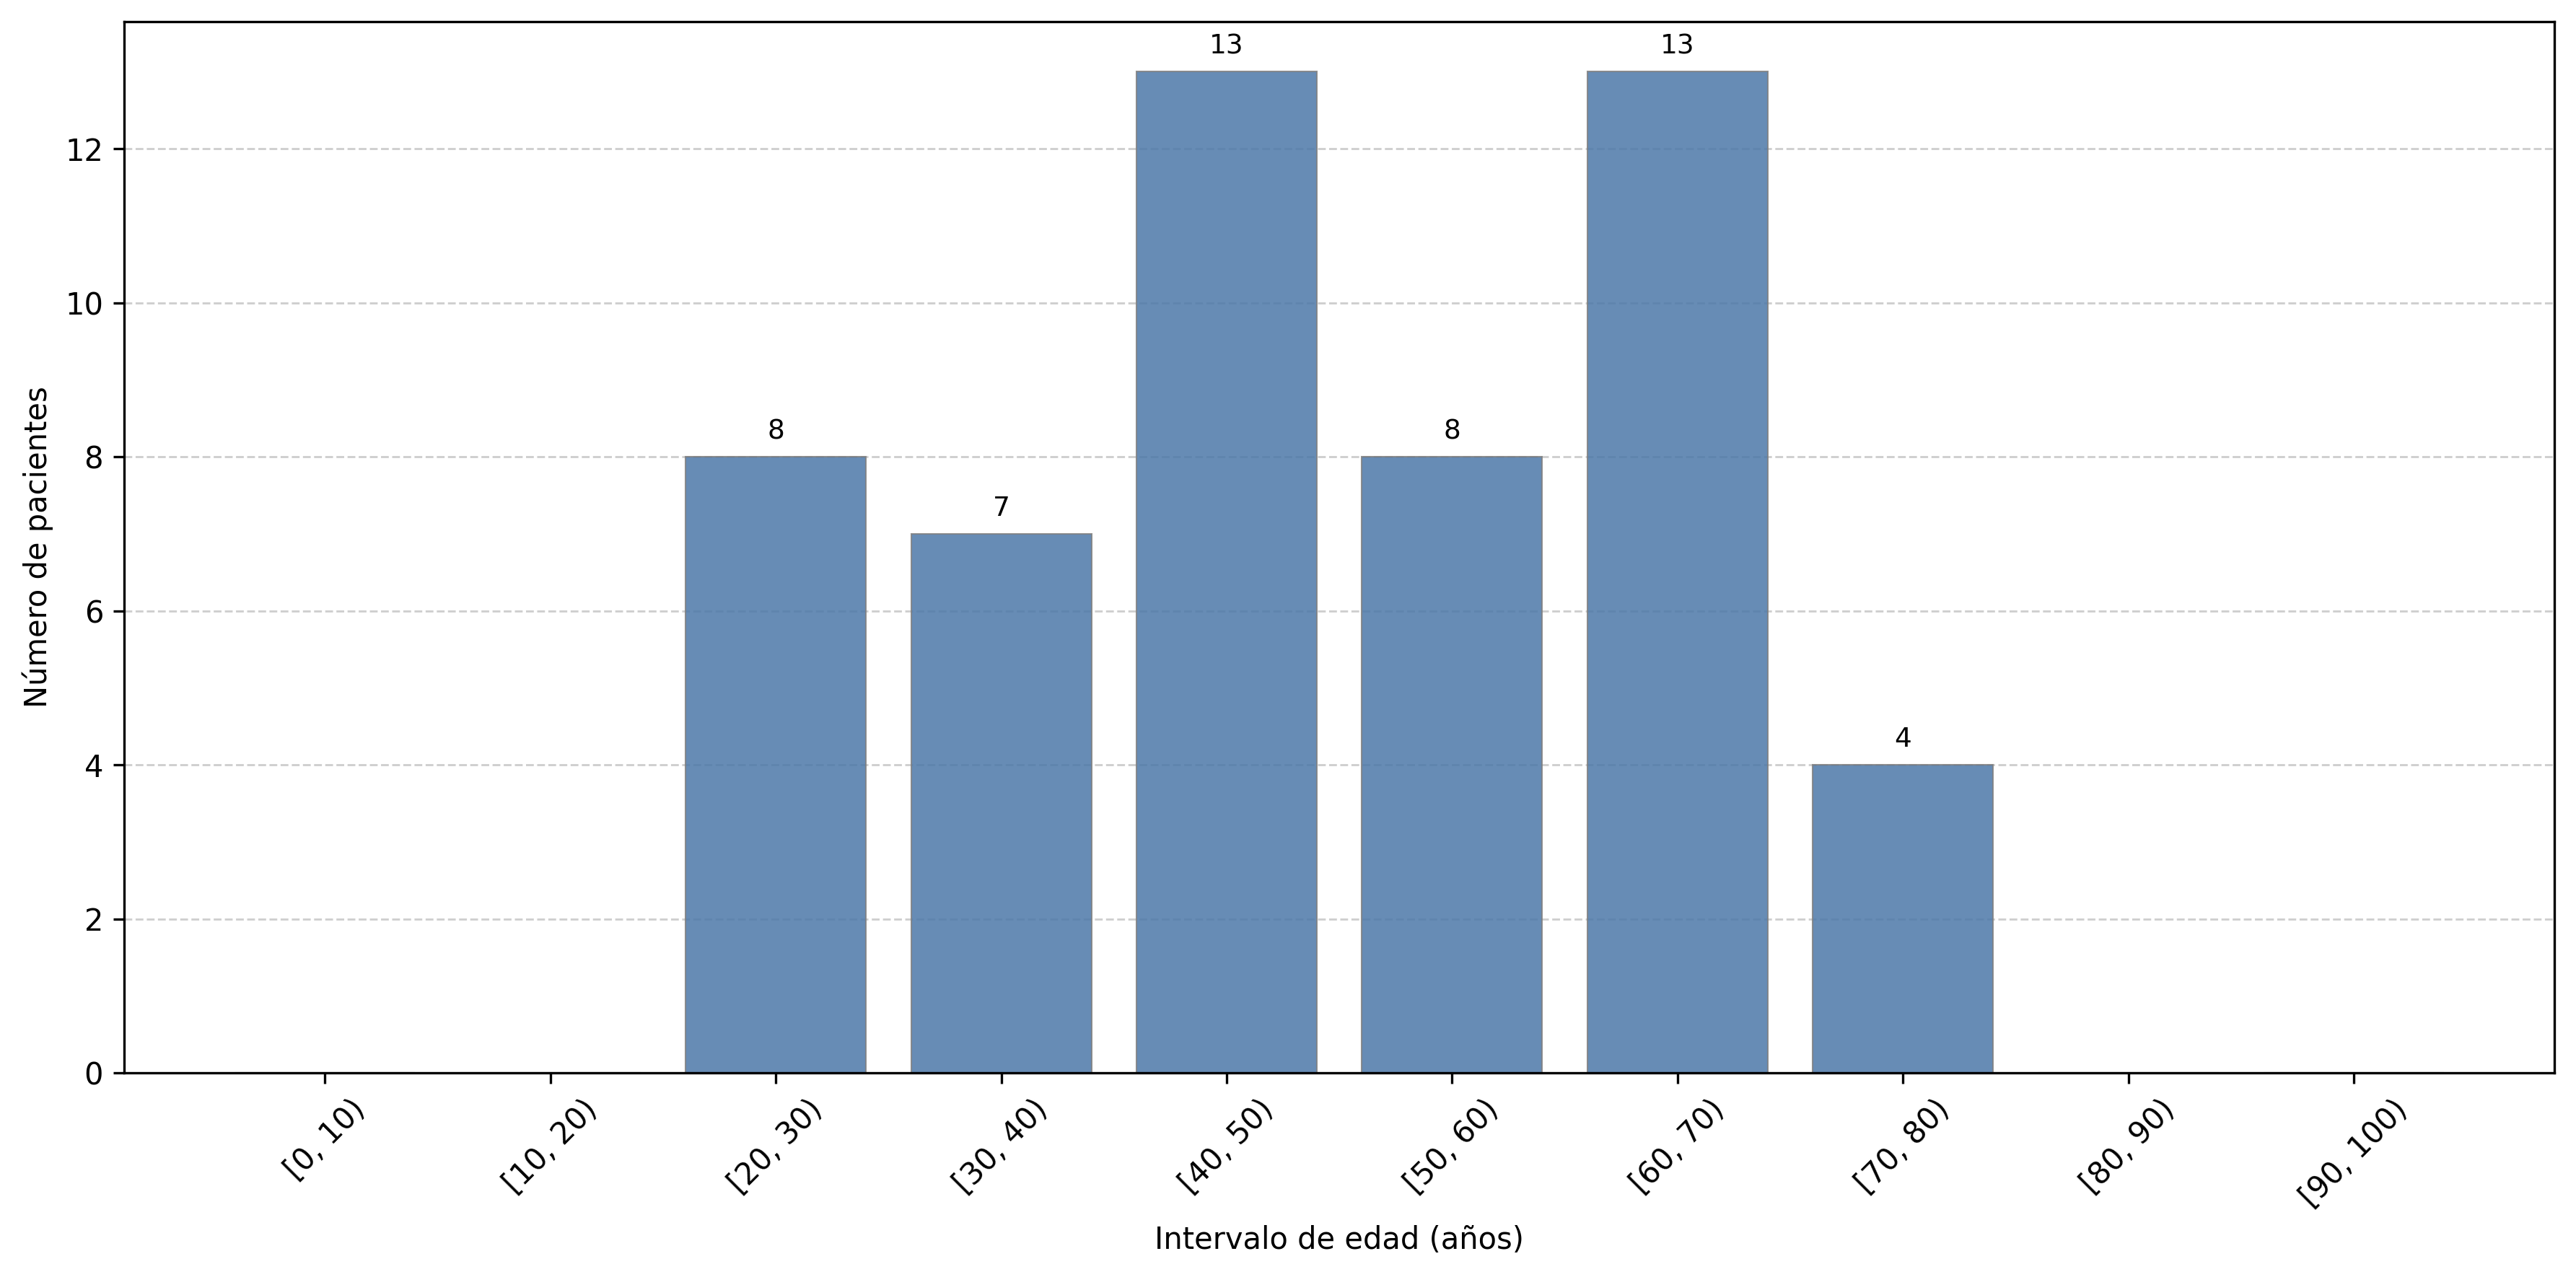

In [111]:
import matplotlib.pyplot as plt

# Preparamos las etiquetas para cada intervalo
etiquetas_edad = [f'[{i}, {i+10})' for i in intervalos_edad[:-1]]
valores_frecuencia = tabla_frecuencias.values.tolist()

# Creamos la figura y las barras manteniendo el formato original
figura, eje = plt.subplots(figsize=(12, 6), dpi=300)
barras = eje.bar(
    etiquetas_edad,
    valores_frecuencia,
    color='#4C78A8',
    edgecolor='gray',
    linewidth=0.5,
    alpha=0.85
)

# Etiquetas de los ejes y cuadrícula
eje.set_xlabel('Intervalo de edad (años)')
eje.set_ylabel('Número de pacientes')
eje.yaxis.grid(True, linestyle='--', linewidth=0.7, alpha=0.6)
eje.set_axisbelow(True)
eje.tick_params(axis='x', rotation=45)

# Añadimos anotaciones con el recuento sobre cada barra
for barra in barras:
    altura = barra.get_height()
    if altura > 0:
        eje.annotate(
            f'{int(altura)}',
            xy=(barra.get_x() + barra.get_width() / 2, altura),
            xytext=(0, 4),
            textcoords='offset points',
            ha='center',
            va='bottom',
            fontsize=9
        )

# Guardamos la figura en PDF y la mostramos
plt.tight_layout()
plt.savefig('distribucion_edad.pdf')
plt.show()


In [112]:
import numpy as np

# Definimos los límites y etiquetas para las categorías de IMC
limites_imc = [0, 18.5, 25.0, 30.0, np.inf]
etiquetas_imc = ['Infrapeso', 'Normopeso', 'Sobrepeso', 'Obesidad grado']

# Creamos la columna que asigna cada registro a su categoría de IMC
pacientes_df['Categoria_IMC'] = pd.cut(
    pacientes_df['IMC'],
    bins=limites_imc,
    labels=etiquetas_imc,
    right=False
)

# Calculamos recuento y porcentaje de pacientes por categoría
resumen_imc = (
    pacientes_df['Categoria_IMC']
    .value_counts()
    .rename_axis('Categoría IMC')
    .reset_index(name='Pacientes')
)
resumen_imc['Porcentaje (%)'] = (
    (resumen_imc['Pacientes'] / len(pacientes_df) * 100)
    .round(2)
)

# Mostramos el resumen de distribución de IMC
display(resumen_imc)

,Categoría IMC,Pacientes,Porcentaje (%)
0,Sobrepeso,23,43.40
1,Normopeso,17,32.08
2,Obesidad grado,11,20.75
3,Infrapeso,1,1.89


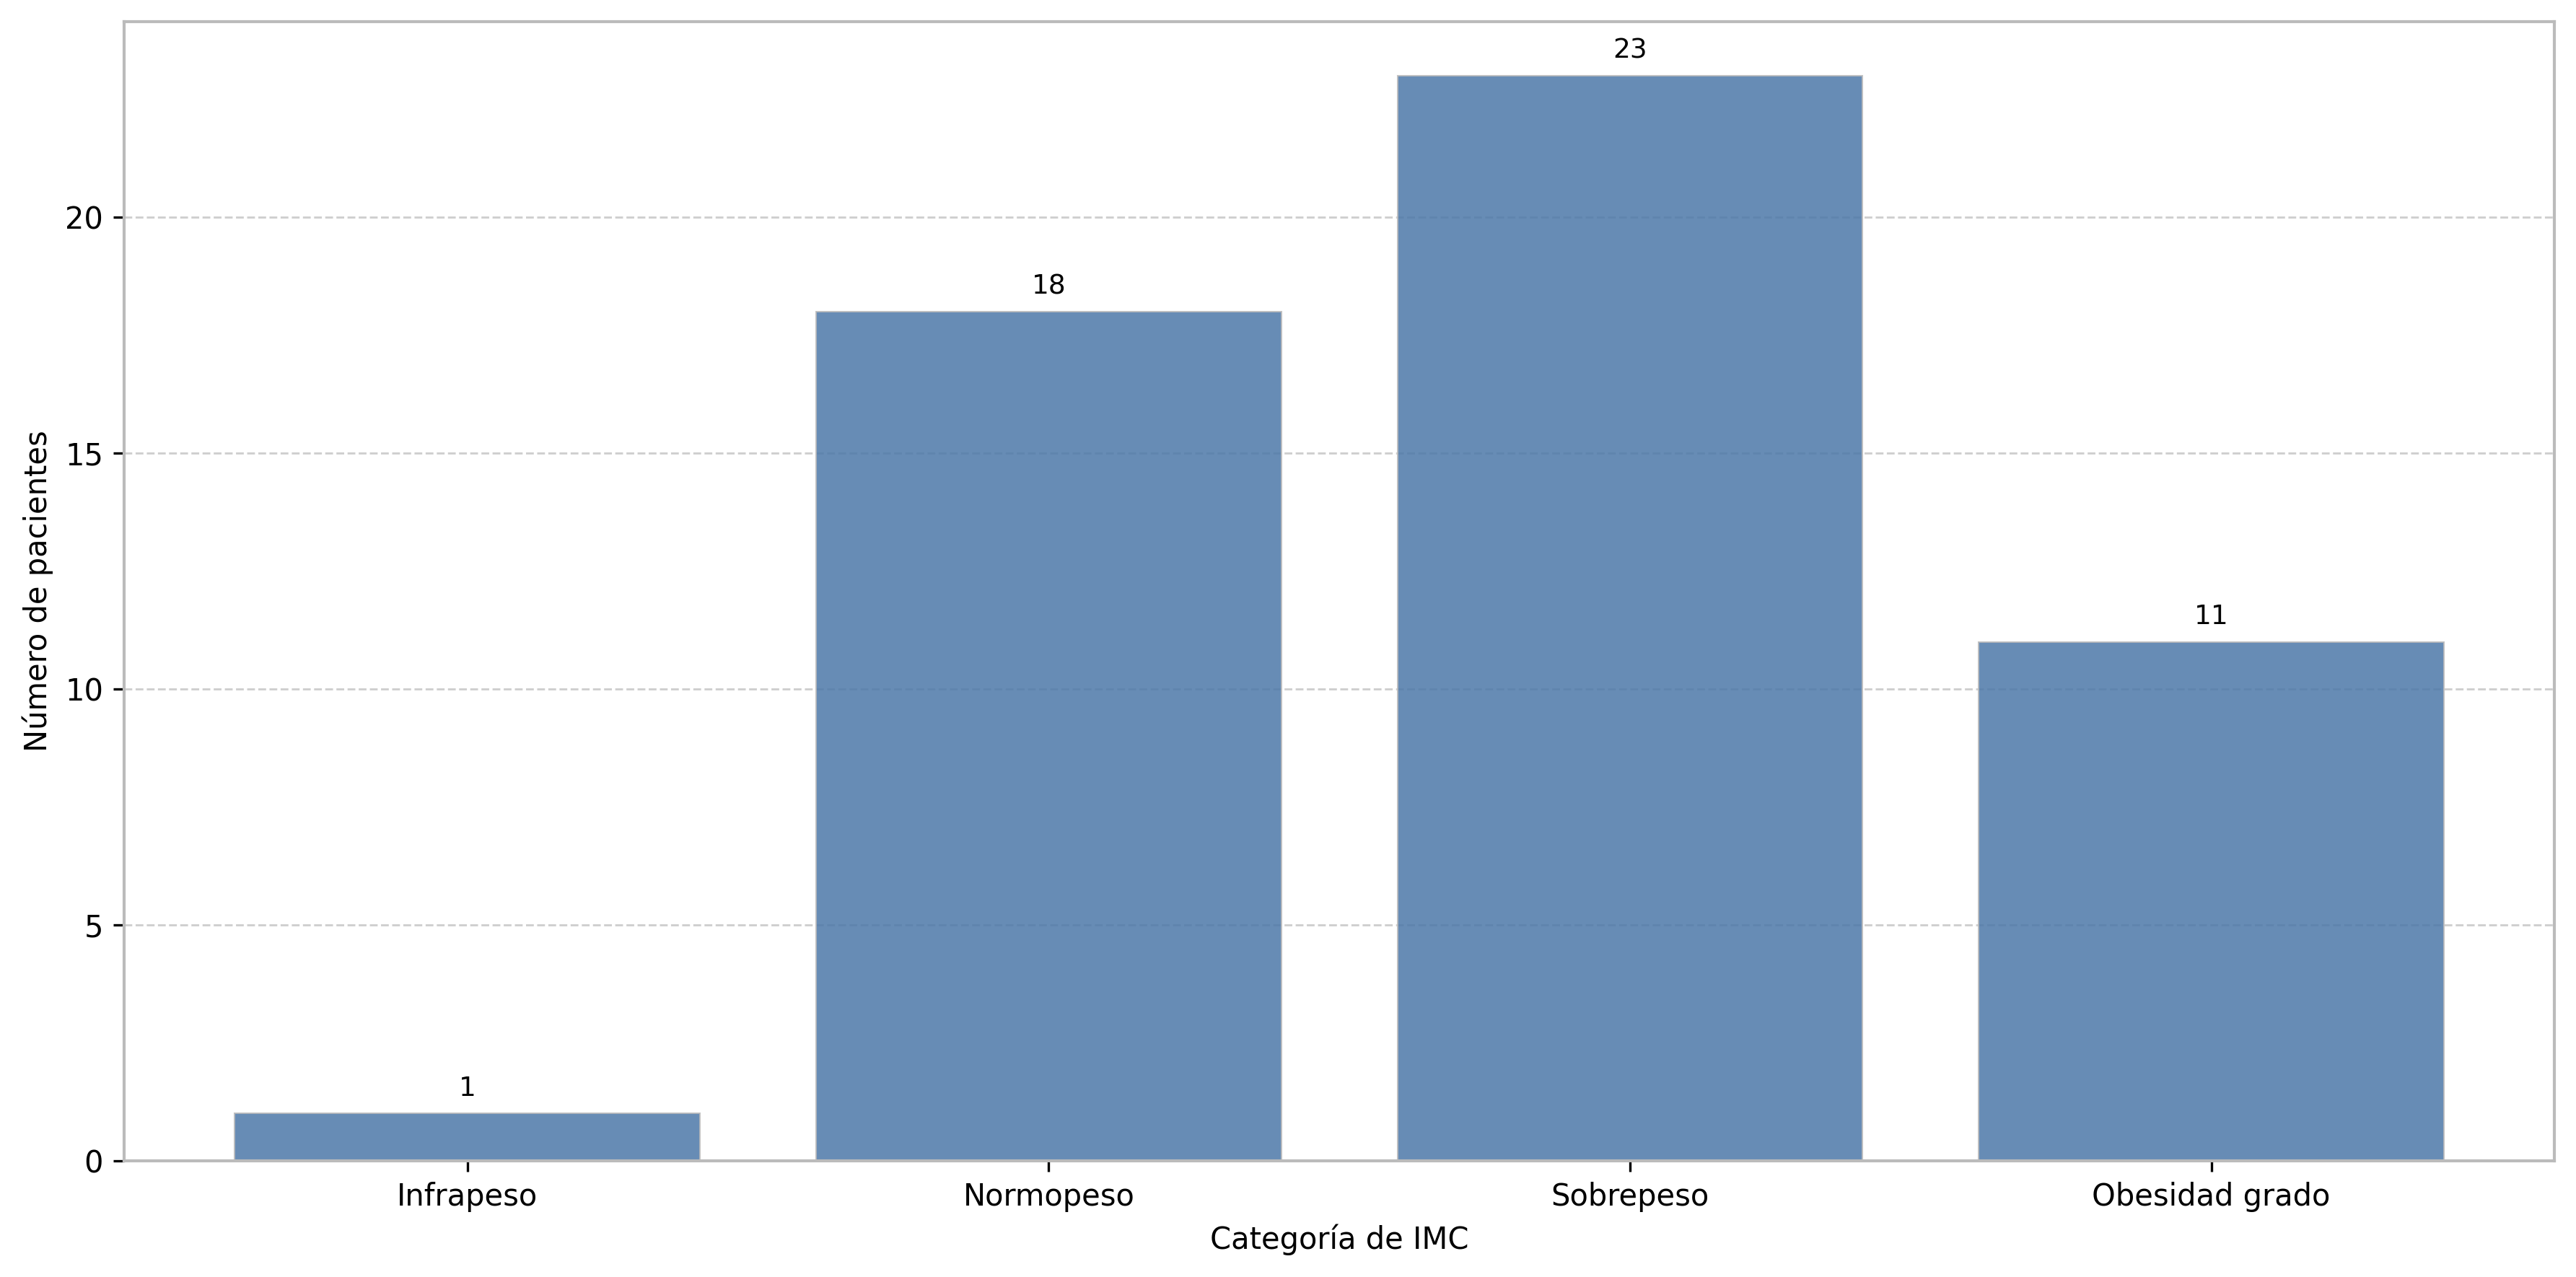

In [113]:
import matplotlib.pyplot as plt
from collections import Counter

# Definimos las categorías de IMC y calculamos sus frecuencias
categorias_imc = (
    ['Infrapeso'] * 1 +
    ['Normopeso'] * 18 +
    ['Sobrepeso'] * 23 +
    ['Obesidad grado'] * 11
)
orden_categorias = ['Infrapeso', 'Normopeso', 'Sobrepeso', 'Obesidad grado']
frecuencias = [Counter(categorias_imc)[cat] for cat in orden_categorias]

# Creamos la figura y establecemos el color de los ejes
figura, eje = plt.subplots(figsize=(12, 6), dpi=300)
color_ejes = '#BBBBBB'
for borde in ['top', 'bottom', 'left', 'right']:
    eje.spines[borde].set_color(color_ejes)
    eje.spines[borde].set_linewidth(1.0)

# Dibujamos las barras con borde del mismo color que los ejes
barras = eje.bar(
    orden_categorias,
    frecuencias,
    color='#4C78A8',
    edgecolor=color_ejes,
    linewidth=0.5,
    alpha=0.85,
    zorder=2
)

# Etiquetamos ejes, configuramos cuadrícula y orden del z-index
eje.set_xlabel('Categoría de IMC')
eje.set_ylabel('Número de pacientes')
eje.yaxis.grid(True, linestyle='--', linewidth=0.7, alpha=0.6)
eje.set_axisbelow(True)
eje.tick_params(axis='x', rotation=0)

# Añadimos anotaciones con los recuentos sobre cada barra
for barra in barras:
    altura = barra.get_height()
    if altura > 0:
        eje.annotate(
            f'{int(altura)}',
            xy=(barra.get_x() + barra.get_width() / 2, altura),
            xytext=(0, 4),
            textcoords='offset points',
            ha='center',
            va='bottom',
            fontsize=9
        )

# Ajustamos el diseño, guardamos el gráfico y lo mostramos
plt.tight_layout()
plt.savefig('distribucion_categoria_IMC.pdf')
plt.show()



In [114]:
# Calculamos el porcentaje de cada categoría de sexo
porcentaje_sexo = pacientes_df['Sexo'].value_counts(normalize=True) * 100
porcentaje_sexo = porcentaje_sexo.round(2)

# Formateamos el resultado como DataFrame para su visualización
df_porcentaje_sexo = porcentaje_sexo.rename_axis('Sexo') \
                                     .reset_index(name='Porcentaje (%)')

df_porcentaje_sexo


,Sexo,Porcentaje (%)
0,Varón,66.04
1,Mujer,33.96


In [115]:
# Extraemos la columna de tipo de diabetes
tipo_diabetes_df = pacientes_df[['Tipo de diabetes']].copy()

# Mostramos las primeras filas para inspeccionar los datos
display(tipo_diabetes_df.head())

# Calculamos la frecuencia de cada categoría de diabetes
frecuencia_tipo = (
    tipo_diabetes_df['Tipo de diabetes']
    .value_counts()
    .rename_axis('Tipo de diabetes')
    .reset_index(name='Frecuencia')
)

# Mostramos la tabla de frecuencias resultante
display(frecuencia_tipo)


,Tipo de diabetes
0,Diabetes mellitus tipo 1
1,Diabetes mellitus tipo 1
2,Diabetes mellitus tipo 1
3,Diabetes mellitus tipo 1
4,Diabetes mellitus tipo 1


,Tipo de diabetes,Frecuencia
0,Diabetes mellitus tipo 1,41
1,LADA,12


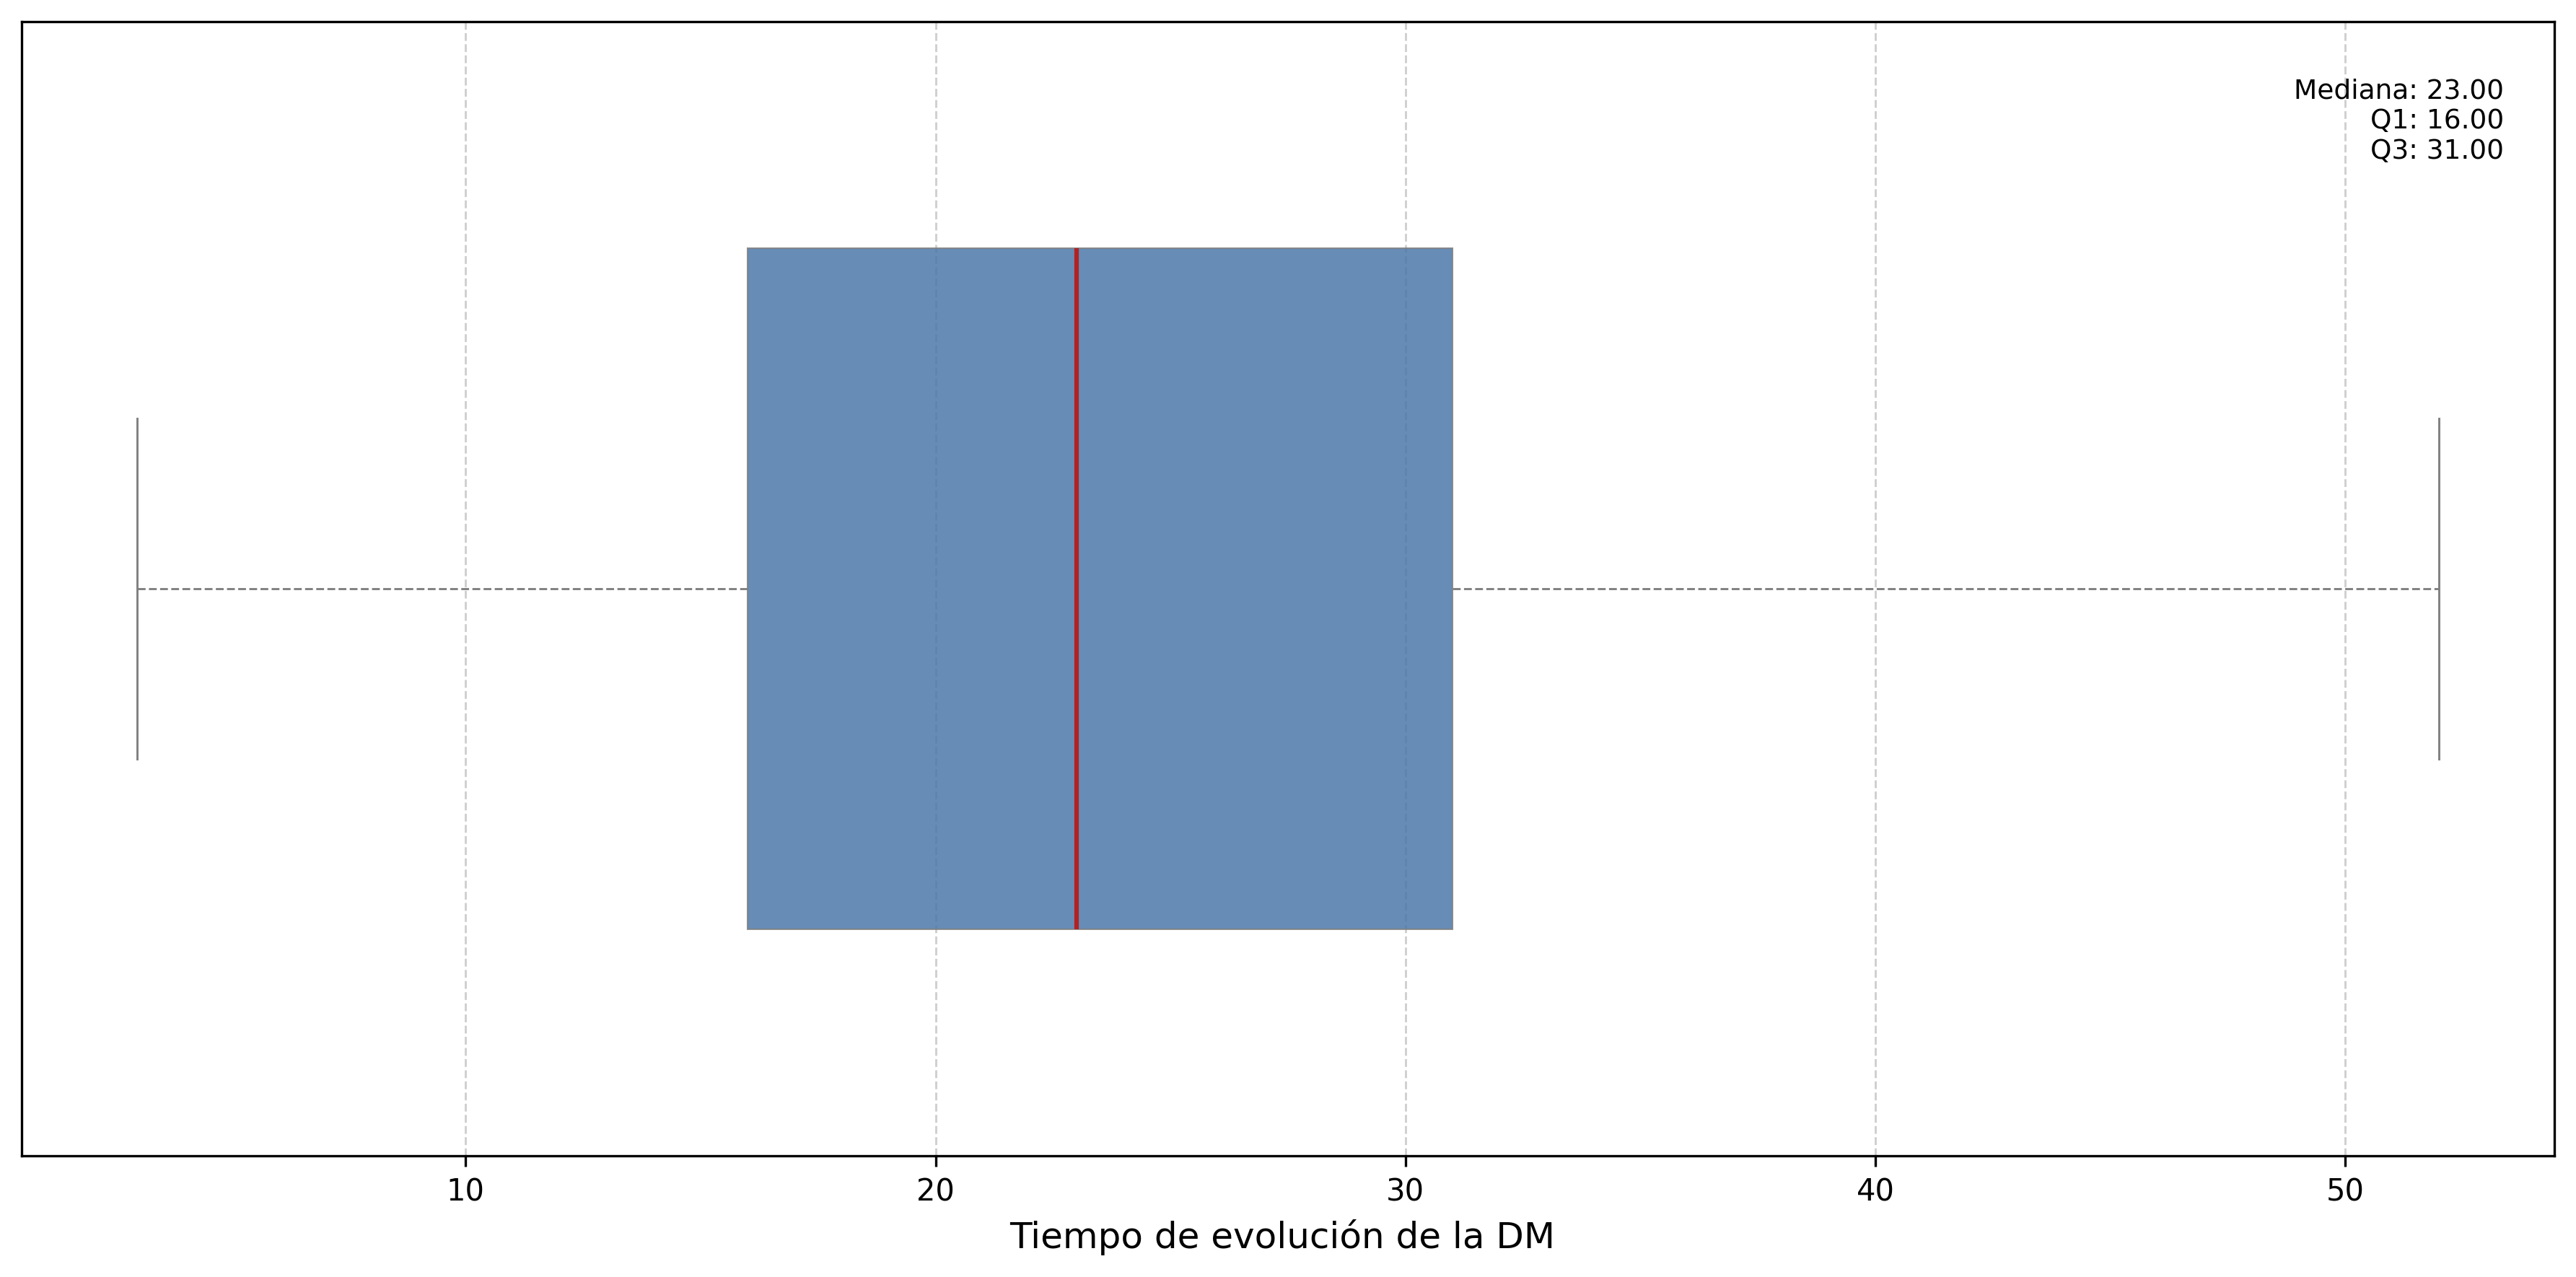

In [116]:
# Preparamos la serie de tiempo de evolución de la DM, excluyendo valores ausentes
tiempo_evolucion = pacientes_df['Tiempo de evolución de la DM '].dropna()

# Creamos la figura y los ejes con dimensiones y resolución establecidas
figura, eje = plt.subplots(figsize=(12, 6), dpi=300)

# Representamos un diagrama de caja horizontal con estilo personalizado
eje.boxplot(
    tiempo_evolucion,
    vert=False,
    widths=0.6,
    patch_artist=True,
    boxprops=dict(facecolor='#4C78A8', edgecolor='gray', linewidth=0.5, alpha=0.85),
    medianprops=dict(color='firebrick', linewidth=1.5),
    whiskerprops=dict(color='gray', linewidth=0.7, linestyle='--'),
    capprops=dict(color='gray', linewidth=0.7),
    flierprops=dict(
        marker='o',
        markerfacecolor='red',
        markeredgecolor='black',
        markersize=6,
        alpha=0.9
    )
)

# Etiquetamos el eje X y ocultamos las marcas del eje Y
eje.set_xlabel('Tiempo de evolución de la DM ', fontsize=12)
eje.set_yticks([])

# Activamos la cuadrícula horizontal y aseguramos que esté debajo de los datos
eje.xaxis.grid(True, linestyle='--', linewidth=0.7, alpha=0.6)
eje.set_axisbelow(True)
eje.tick_params(axis='x', labelsize=10)

# Calculamos la mediana y los cuartiles, y los anotamos en la gráfica
mediana = np.median(tiempo_evolucion)
q1, q3 = np.percentile(tiempo_evolucion, [25, 75])
texto_estadisticos = f'Mediana: {mediana:.2f}\nQ1: {q1:.2f}\nQ3: {q3:.2f}'
eje.text(
    0.98, 0.95, texto_estadisticos,
    transform=eje.transAxes,
    fontsize=9,
    verticalalignment='top',
    horizontalalignment='right'
)

# Ajustamos el diseño, guardamos la figura en PDF y la mostramos
plt.tight_layout()
plt.savefig('boxplot_tiempo_evolucion.pdf')
plt.show()


In [117]:
# Nos aseguramos matemáticamente de que no haya outliers en el tiempo de evolución de la DM
tiempo_evolucion = pacientes_df['Tiempo de evolución de la DM '].dropna()

# Calculamos cuartiles e IQR
q1, q3 = np.percentile(tiempo_evolucion, [25, 75])
iqr = q3 - q1

# Definimos los límites para detección de valores atípicos
limite_inferior = q1 - 1.5 * iqr
limite_superior = q3 + 1.5 * iqr

# Mostramos estadísticas clave
print(f"Q1: {q1:.2f}, Q3: {q3:.2f}, IQR: {iqr:.2f}")
print(f"Límite inferior: {limite_inferior:.2f}, Límite superior: {limite_superior:.2f}")

# Identificamos y mostramos los outliers
outliers = tiempo_evolucion[(tiempo_evolucion < limite_inferior) | (tiempo_evolucion > limite_superior)]
print("Valores atípicos detectados:")
print(outliers)

Q1: 16.00, Q3: 31.00, IQR: 15.00
Límite inferior: -6.50, Límite superior: 53.50
Valores atípicos detectados:
Series([], Name: Tiempo de evolución de la DM , dtype: int64)


,count,mean,std,min,25%,50%,75%,max,missing
HbA1c valor,52.0,7.544231,1.287102,5.6,6.675,7.3,8.150,11.9,1
HbA1c valor (segundo valor),50.0,7.584000,1.219796,5.6,6.700,7.3,8.275,10.9,3


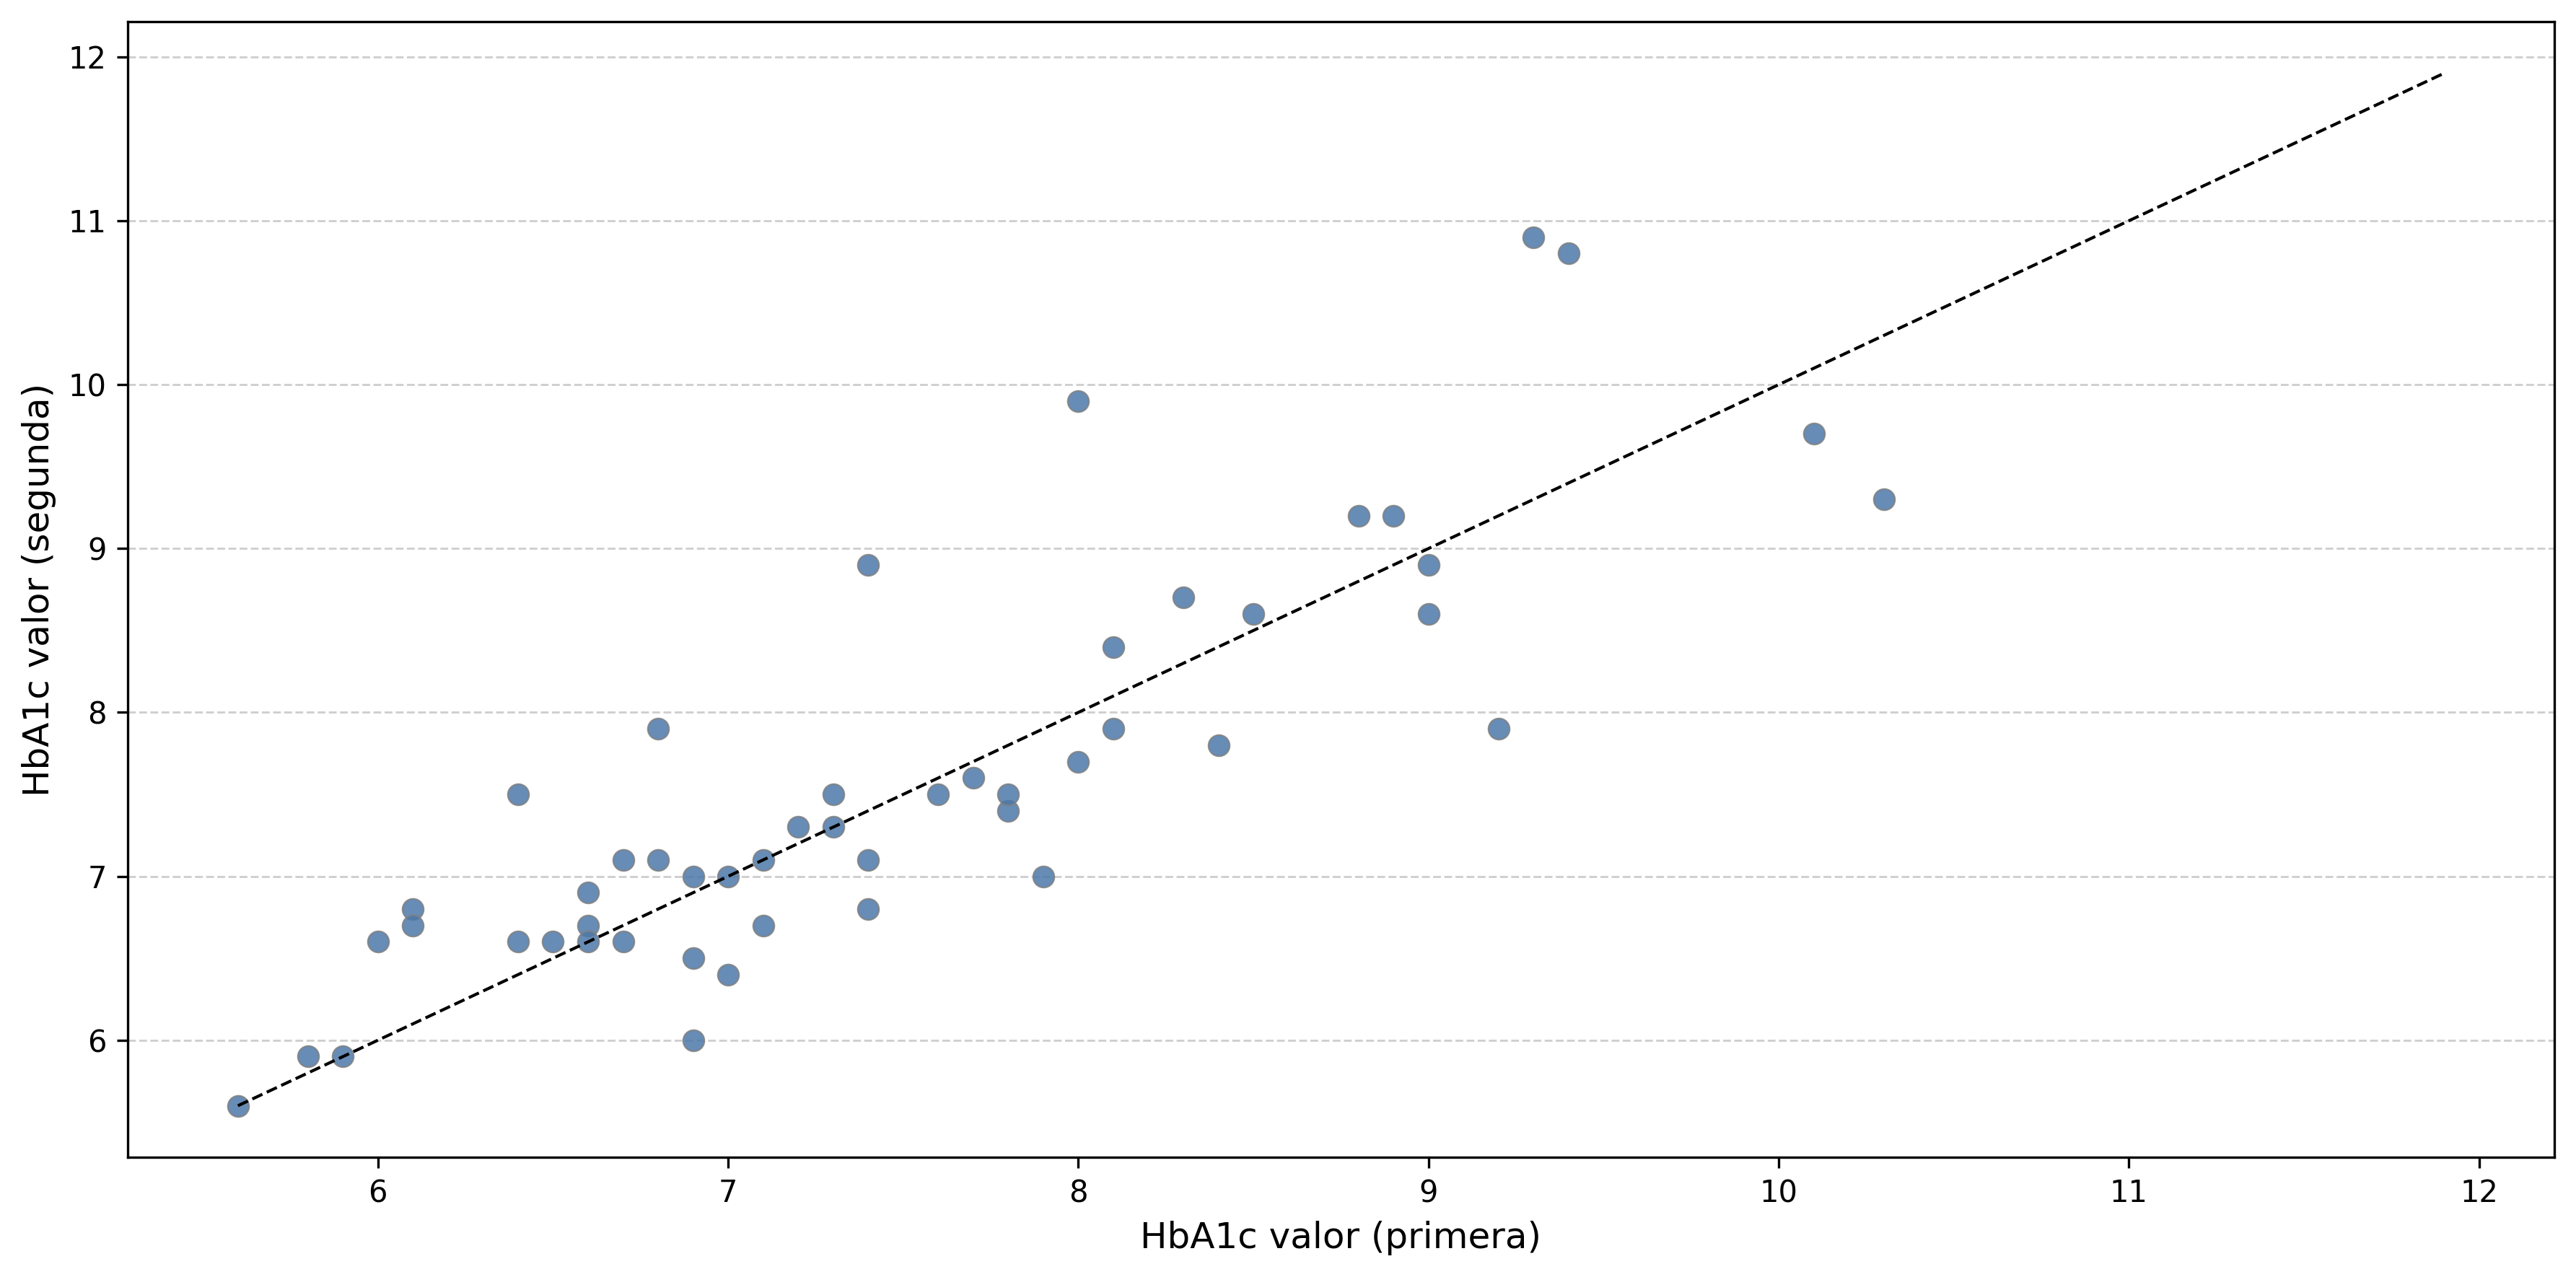

In [118]:
# Calculamos estadísticos descriptivos y detectamos valores faltantes en HbA1c
estadisticas_hba1c = pacientes_df[['HbA1c valor', 'HbA1c valor (segundo valor)']].describe().T
estadisticas_hba1c['missing'] = pacientes_df[['HbA1c valor', 'HbA1c valor (segundo valor)']].isna().sum()
display(estadisticas_hba1c)

# Preparamos los datos para la comparación
hba1c_primera = pacientes_df['HbA1c valor']
hba1c_segunda = pacientes_df['HbA1c valor (segundo valor)']
mask_hba1c = hba1c_primera.notna() & hba1c_segunda.notna()

# Creamos el scatter manteniendo el formato original
figura, eje = plt.subplots(figsize=(12, 6), dpi=300)
eje.scatter(
    hba1c_primera[mask_hba1c],
    hba1c_segunda[mask_hba1c],
    color='#4C78A8',
    edgecolor='gray',
    linewidth=0.5,
    alpha=0.85,
    s=50
)
# Añadimos línea identidad para facilitar la interpretación
eje.plot(
    [hba1c_primera.min(), hba1c_primera.max()],
    [hba1c_primera.min(), hba1c_primera.max()],
    'k--',
    linewidth=1
)

# Etiquetamos ejes y configuramos la cuadrícula
eje.set_xlabel('HbA1c valor (primera)', fontsize=12)
eje.set_ylabel('HbA1c valor (segunda)', fontsize=12)
eje.yaxis.grid(True, linestyle='--', linewidth=0.7, alpha=0.6)
eje.set_axisbelow(True)
eje.tick_params(axis='x', labelsize=10)
eje.tick_params(axis='y', labelsize=10)

# Ajustamos el layout, guardamos en PDF y mostramos
plt.tight_layout()
plt.savefig('comparacion_HbA1c_scatter.pdf')
plt.show()


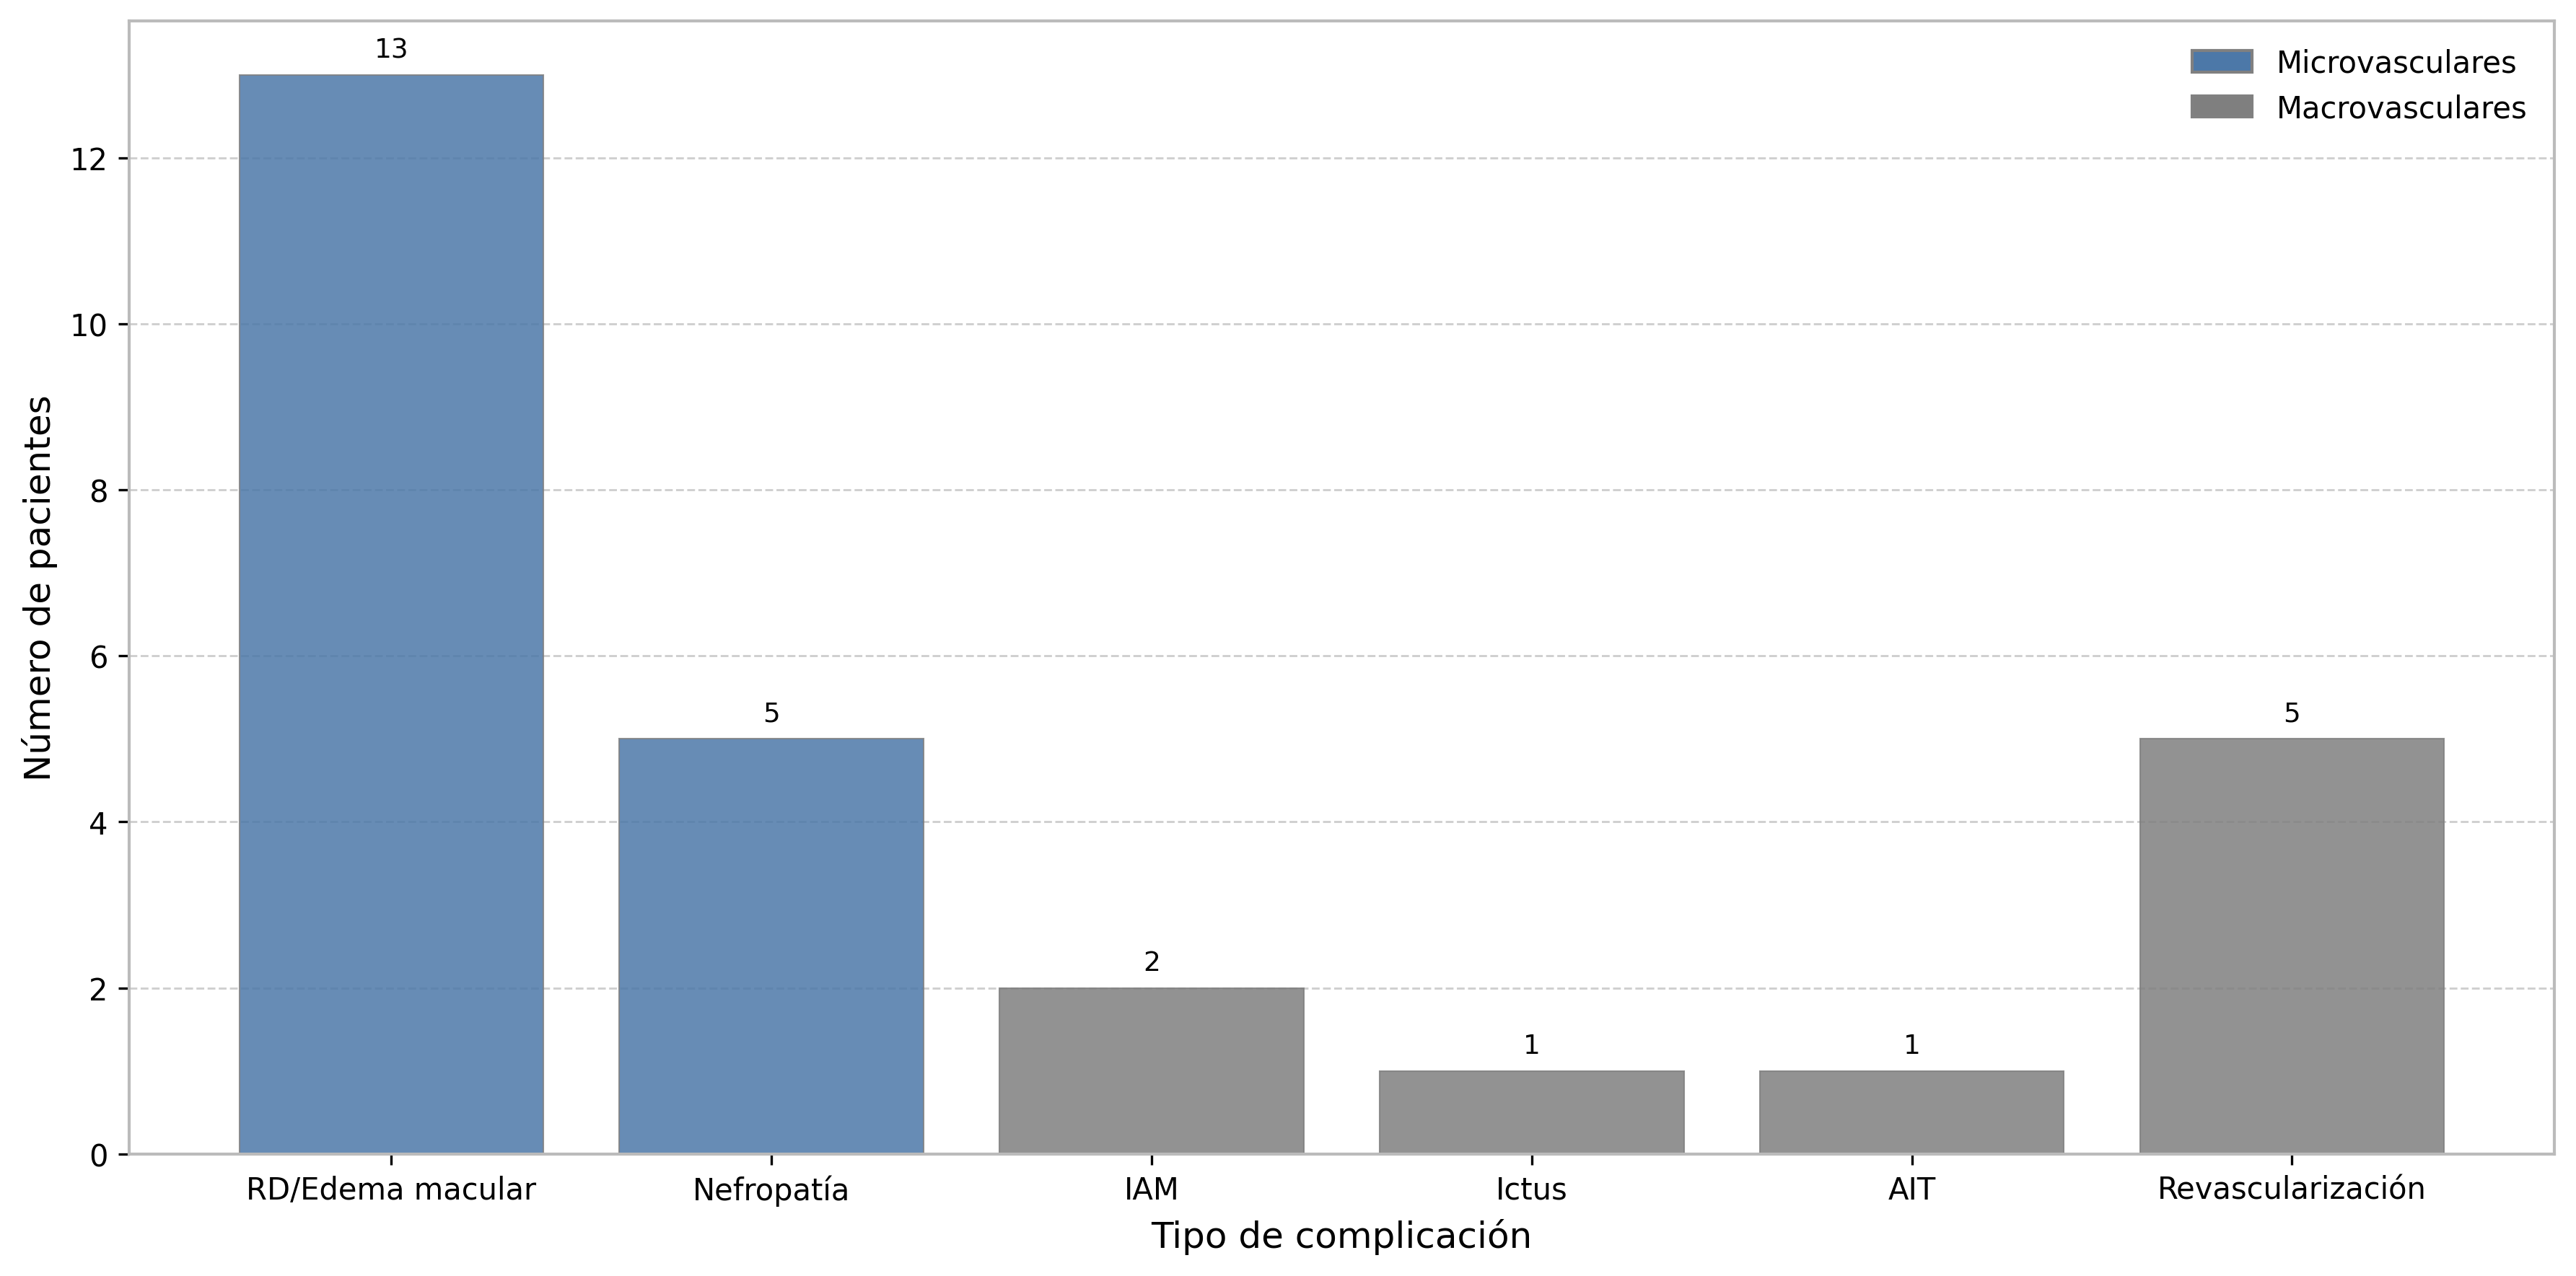

In [119]:
from matplotlib.patches import Patch

# Definimos las frecuencias de cada tipo de complicación
frecuencias_complicaciones = {
    'RD/Edema macular': 13,
    'Nefropatía': 5,
    'IAM': 2,
    'Ictus': 1,
    'AIT': 1,
    'Revascularización': 5
}

# Clasificamos las complicaciones en microvasculares y macrovasculares
microvasculares = {'RD/Edema macular', 'Nefropatía'}
macrovasculares = set(frecuencias_complicaciones) - microvasculares

# Preparamos el orden, los valores y los colores de las barras
orden_complicaciones = list(frecuencias_complicaciones.keys())
valores_complicaciones = [frecuencias_complicaciones[c] for c in orden_complicaciones]
color_micro = '#4C78A8'
color_macro = '#7F7F7F'
colores_barras = [
    color_micro if c in microvasculares else color_macro
    for c in orden_complicaciones
]

# Creamos la figura y el eje con tamaño y resolución definidos
figura, eje = plt.subplots(figsize=(12, 6), dpi=300)

# Ajustamos el color de los bordes de los ejes a gris claro
spine_color = '#BBBBBB'
for borde in ['top', 'bottom', 'left', 'right']:
    eje.spines[borde].set_color(spine_color)
    eje.spines[borde].set_linewidth(1.0)

# Dibujamos el histograma de complicaciones
barras = eje.bar(
    orden_complicaciones,
    valores_complicaciones,
    color=colores_barras,
    edgecolor='gray',
    linewidth=0.5,
    alpha=0.85,
    zorder=2
)

# Etiquetamos los ejes y configuramos la cuadrícula en el eje Y
eje.set_xlabel('Tipo de complicación', fontsize=12)
eje.set_ylabel('Número de pacientes', fontsize=12)
eje.yaxis.grid(True, linestyle='--', linewidth=0.7, alpha=0.6)
eje.set_axisbelow(True)
eje.tick_params(axis='x', rotation=0, labelsize=10)
eje.tick_params(axis='y', labelsize=10)

# Añadimos anotaciones de recuento sobre cada barra
for barra in barras:
    altura = barra.get_height()
    if altura > 0:
        eje.annotate(
            f'{int(altura)}',
            xy=(barra.get_x() + barra.get_width() / 2, altura),
            xytext=(0, 4),
            textcoords='offset points',
            ha='center',
            va='bottom',
            fontsize=9
        )

# Creamos y añadimos la leyenda para microvasculares y macrovasculares
manejadores_leyenda = [
    Patch(facecolor=color_micro, edgecolor='gray', label='Microvasculares'),
    Patch(facecolor=color_macro, edgecolor='gray', label='Macrovasculares')
]
eje.legend(handles=manejadores_leyenda, loc='upper right', frameon=False, fontsize=10)

# Ajustamos el diseño, guardamos el gráfico en PDF y lo mostramos
plt.tight_layout()
plt.savefig('histograma_complicaciones.pdf')
plt.show()


### 2.2. Análisis de la Información de Los CGM

#### 2.2.1. Análisis Estadístico Descriptivo

In [120]:
# Seleccionamos los datos del paciente 1
indice_paciente = 1
df_paciente = datos_pacientes[f'paciente{indice_paciente}']

# Mostramos las dimensiones del dataset
print("Dimensiones del dataset:")
print("-" * 40)
print(f"El dataset tiene {df_paciente.shape[0]} filas y {df_paciente.shape[1]} columnas.\n")

# Listamos nombres y tipos de las columnas
print("Nombres y tipos de columnas:")
print("-" * 40)
for nombre, tipo in df_paciente.dtypes.items():
    print(f"{nombre}: {tipo}")
print()

# Calculamos valores faltantes y su porcentaje
faltantes = df_paciente.isnull().sum()
porcentaje = (faltantes / len(df_paciente) * 100).round(2)
print("Datos faltantes por columna:")
print("-" * 40)
display(pd.DataFrame({
    'Datos faltantes': faltantes,
    'Porcentaje (%)': porcentaje
}))

# Eliminamos columnas completamente vacías y actualizamos el DataFrame
columnas_vacias = df_paciente.columns[df_paciente.isnull().all()].tolist()
df_paciente = df_paciente.drop(columns=columnas_vacias)
print("\nColumnas restantes tras eliminar las vacías:")
print("-" * 40)
print(df_paciente.columns.tolist())
print(f"\nQuedan {df_paciente.shape[1]} columnas útiles.")

Dimensiones del dataset:
----------------------------------------
El dataset tiene 60833 filas y 19 columnas.

Nombres y tipos de columnas:
----------------------------------------
Dispositivo: object
Número de serial: object
Sello de tiempo del dispositivo: object
Tipo de registro: int64
Historial de glucosa mg/dL: float64
Escaneo de glucosa mg/dL: float64
Insulina de acción rápida no numérica: float64
Insulina de acción rápida (unidades): float64
Alimento no numérico: float64
Carbohidratos (gramos): float64
Carbohidratos (porciones): float64
Insulina de acción larga no numérica: float64
Insulina de acción larga (unidades): float64
Notas: object
Tira reactiva para glucosa mg/dL: float64
Cuerpos cetónicos mmol/L: float64
Comida e insulina (unidades): float64
Insulina de corrección (unidades): float64
Insulina del cambio de usuario (unidades): float64

Datos faltantes por columna:
----------------------------------------


,Datos faltantes,Porcentaje (%)
Dispositivo,34,0.06
Número de serial,0,0.00
Sello de tiempo del dispositivo,0,0.00
Tipo de registro,0,0.00
Historial de glucosa mg/dL,35914,59.04
Escaneo de glucosa mg/dL,58932,96.88
Insulina de acción rápida no numérica,60833,100.00
Insulina de acción rápida (unidades),60810,99.96
Alimento no numérico,60833,100.00
Carbohidratos (gramos),60833,100.00



Columnas restantes tras eliminar las vacías:
----------------------------------------
['Dispositivo', 'Número de serial', 'Sello de tiempo del dispositivo', 'Tipo de registro', 'Historial de glucosa mg/dL', 'Escaneo de glucosa mg/dL', 'Insulina de acción rápida (unidades)', 'Insulina de acción larga (unidades)']

Quedan 8 columnas útiles.


In [121]:
# Calculamos la distribución de 'Tipo de registro' por paciente
filas = []
for paciente, df in datos_pacientes.items():
    conteos = df['Tipo de registro'].value_counts(dropna=False)
    total = conteos.sum()
    for tipo, cnt in conteos.items():
        filas.append({
            'Paciente': paciente,
            'Tipo de registro': tipo,
            'Recuento': cnt,
            'Porcentaje (%)': cnt / total * 100
        })

df_distribucion = pd.DataFrame(filas)

# Creamos una tabla pivot con recuentos y porcentajes por paciente
tabla_pivot = df_distribucion.pivot(
    index='Paciente',
    columns='Tipo de registro',
    values=['Recuento', 'Porcentaje (%)']
)
tabla_pivot.columns = [
    f'{estadístico}_{tipo}'
    for estadístico, tipo in tabla_pivot.columns
]
tabla_pivot = tabla_pivot.fillna(0).sort_index()

# Mostramos la distribución por paciente, redondeada a una cifra decimal
display(tabla_pivot.round(1))

# Calculamos la distribución global agregada
conteos_globales = df_distribucion.groupby('Tipo de registro')['Recuento'].sum()
porcentaje_global = conteos_globales / conteos_globales.sum() * 100
df_global = pd.DataFrame({
    'Recuento': conteos_globales,
    'Porcentaje (%)': porcentaje_global
})

# Mostramos la distribución global, redondeada a tres decimales
display(df_global.round(3))

,Recuento_nan,Recuento_0.0,Recuento_1.0,Recuento_2.0,Recuento_4.0,Recuento_5.0,Recuento_6.0,Porcentaje (%)_nan,Porcentaje (%)_0.0,Porcentaje (%)_1.0,Porcentaje (%)_2.0,Porcentaje (%)_4.0,Porcentaje (%)_5.0,Porcentaje (%)_6.0
Paciente,,,,,,,,,,,,,,
paciente1,0.0,24919.0,1901.0,0.0,34.0,0.0,33979.0,0.0,41.0,3.1,0.0,0.1,0.0,55.9
paciente10,0.0,37717.0,26154.0,0.0,6.0,1.0,5606.0,0.0,54.3,37.6,0.0,0.0,0.0,8.1
paciente11,0.0,51898.0,5484.0,0.0,0.0,0.0,2011.0,0.0,87.4,9.2,0.0,0.0,0.0,3.4
paciente12,0.0,52350.0,5958.0,0.0,1.0,0.0,41641.0,0.0,52.4,6.0,0.0,0.0,0.0,41.7
paciente13,576.0,58411.0,8277.0,0.0,1.0,436.0,25266.0,0.6,62.8,8.9,0.0,0.0,0.5,27.2
paciente14,0.0,54990.0,7364.0,0.0,0.0,1.0,2582.0,0.0,84.7,11.3,0.0,0.0,0.0,4.0
paciente15,356.0,54928.0,4668.0,0.0,0.0,20.0,26709.0,0.4,63.4,5.4,0.0,0.0,0.0,30.8
paciente16,0.0,53152.0,6015.0,0.0,0.0,0.0,6342.0,0.0,81.1,9.2,0.0,0.0,0.0,9.7
paciente17,815.0,56325.0,11744.0,0.0,1.0,1.0,14026.0,1.0,67.9,14.2,0.0,0.0,0.0,16.9


,Recuento,Porcentaje (%)
Tipo de registro,,
0.0,2587891,67.161
1.0,368282,9.558
2.0,224,0.006
4.0,1788,0.046
5.0,9549,0.248
6.0,885533,22.981


In [122]:
# Calculamos el porcentaje de valores faltantes por variable y paciente
porcentaje_faltantes = {
    paciente: df.isnull().mean() * 100
    for paciente, df in datos_pacientes.items()
}
df_faltantes = pd.DataFrame(porcentaje_faltantes).T

# Obtenemos estadísticas de resumen para cada variable
resumen_faltantes = df_faltantes.agg(['mean', 'median', 'std']).T
print("Resumen de datos faltantes por variable:")
display(resumen_faltantes)

Resumen de datos faltantes por variable:


,mean,median,std
Dispositivo,0.001055,0.000000,0.007677
Número de serial,0.425221,0.000000,0.958796
Sello de tiempo del dispositivo,0.425243,0.000000,0.958851
Tipo de registro,0.425265,0.000000,0.958906
Historial de glucosa mg/dL,30.918527,26.807029,15.202763
Escaneo de glucosa mg/dL,90.813836,91.237716,5.714335
Insulina de acción rápida no numérica,99.959592,100.000000,0.236869
Insulina de acción rápida (unidades),99.998944,100.000000,0.005718
Alimento no numérico,99.775459,100.000000,0.596327
Carbohidratos (gramos),99.990967,100.000000,0.063575


In [123]:
# Determinamos las columnas que aportan datos en cada DataFrame de pacientes
conjuntos_columnas = []
for paciente, df in datos_pacientes.items():
    columnas_validas = set(df.columns[df.notna().any()])
    conjuntos_columnas.append(columnas_validas)

# Calculamos la intersección: columnas comunes a todos los pacientes
columnas_comunes = set.intersection(*conjuntos_columnas)

# Mostramos las columnas que aparecen con datos en todos los CSV
print("Columnas con valores en todos los archivos:")
for i, columna in enumerate(sorted(columnas_comunes), 1):
    print(f"{i}. {columna}")

print(f"\nEn total, identificamos {len(columnas_comunes)} columnas comunes.")


Columnas con valores en todos los archivos:
1. Dispositivo
2. Escaneo de glucosa mg/dL
3. Historial de glucosa mg/dL
4. Número de serial
5. Sello de tiempo del dispositivo
6. Tipo de registro

En total, identificamos 6 columnas comunes.


In [124]:
# Recorremos cada paciente para generar nuestro resumen
resumen_pacientes = []
for id_paciente, df in datos_pacientes.items():
    # Convertimos el sello de tiempo del dispositivo a datetime,
    # coercion de errores para entries inválidas
    df['Sello de tiempo del dispositivo'] = pd.to_datetime(
        df['Sello de tiempo del dispositivo'],
        dayfirst=True,
        errors='coerce'
    )

    # Eliminamos filas sin sello de tiempo válido
    df_limpio = df.dropna(subset=['Sello de tiempo del dispositivo'])

    # Calculamos la duración del experimento en días
    delta = (
        df_limpio['Sello de tiempo del dispositivo'].max()
        - df_limpio['Sello de tiempo del dispositivo'].min()
    )
    dias_experimento = delta.days + delta.seconds / 86400

    # Calculamos estadísticos de glucosa en mg/dL
    max_glucosa = df_limpio['Historial de glucosa mg/dL'].max()
    min_glucosa = df_limpio['Historial de glucosa mg/dL'].min()
    media_glucosa = df_limpio['Historial de glucosa mg/dL'].mean()

    # Contamos nuestros registros por paciente
    num_registros = len(df_limpio)

    # Almacenamos los resultados
    resumen_pacientes.append([
        id_paciente,
        round(dias_experimento, 1),
        max_glucosa,
        min_glucosa,
        round(media_glucosa, 2),
        num_registros
    ])

# Creamos el DataFrame con encabezados en español
df_resumen = pd.DataFrame(
    resumen_pacientes,
    columns=[
        'ID Paciente',
        'Días Experimento',
        'Glucosa Máx (mg/dL)',
        'Glucosa Mín (mg/dL)',
        'Glucosa Media (mg/dL)',
        'Registros'
    ]
)

# Calculamos estadísticas globales para añadir como fila final
total_dias = df_resumen['Días Experimento'].sum()
max_global = df_resumen['Glucosa Máx (mg/dL)'].max()
min_global = df_resumen['Glucosa Mín (mg/dL)'].min()
media_global = round(df_resumen['Glucosa Media (mg/dL)'].mean(), 2)
media_registros = round(df_resumen['Registros'].mean(), 2)

# Añadimos la fila de totales
df_resumen.loc[len(df_resumen)] = [
    'Total',
    total_dias,
    max_global,
    min_global,
    media_global,
    media_registros
]

# Mostramos el resumen final
display(df_resumen)


,ID Paciente,Días Experimento,Glucosa Máx (mg/dL),Glucosa Mín (mg/dL),Glucosa Media (mg/dL),Registros
0,paciente1,586.4,500.0,40.0,328.68,60833.00
1,paciente2,585.4,463.0,40.0,136.13,72949.00
2,paciente3,585.4,442.0,40.0,154.06,94484.00
3,paciente4,775.4,500.0,40.0,160.50,47811.00
4,paciente5,585.4,500.0,48.0,228.07,71559.00
5,paciente6,624.7,500.0,40.0,170.96,83398.00
6,paciente7,624.7,406.0,49.0,156.34,58478.00
7,paciente8,624.7,442.0,40.0,168.30,79009.00
8,paciente9,595.3,500.0,40.0,181.02,89778.00
9,paciente10,624.7,479.0,53.0,248.50,69484.00


In [125]:
# Definimos la columna de sello de tiempo del dispositivo
columna_ts = 'Sello de tiempo del dispositivo'

# Inicializamos almacenamiento de estadísticas y acumulador de todos los intervalos
lista_estadisticas = []
todos_intervalos = []

for paciente, df in datos_pacientes.items():
    # Creamos copia para no modificar el original
    df_temp = df.copy()

    # Convertimos a datetime y eliminamos filas sin sello de tiempo válido
    df_temp[columna_ts] = pd.to_datetime(
        df_temp[columna_ts],
        dayfirst=True,
        errors='coerce'
    )
    df_temp = df_temp.dropna(subset=[columna_ts])

    # Ordenamos y calculamos los minutos entre mediciones
    df_temp = df_temp.sort_values(columna_ts)
    intervalos = (
        df_temp[columna_ts]
        .diff()
        .dt.total_seconds()
        .div(60)
        .dropna()
    )
    # Eliminamos intervalos no positivos por si hubiera duplicados o errores
    intervalos = intervalos[intervalos > 0]

    # Calculamos estadísticos clave usando describe
    descr = intervalos.describe(percentiles=[.25, .5, .75])

    lista_estadisticas.append({
        'Paciente': paciente,
        'Media (min)':       descr['mean'],
        'Mediana (min)':     descr['50%'],
        'Desviación (min)':  descr['std'],
        'Percentil 25 (min)': descr['25%'],
        'Percentil 75 (min)': descr['75%'],
        'Mínimo (min)':      descr['min'],
        'Máximo (min)':      descr['max'],
        'Nº intervalos':     int(descr['count'])
    })

    # Acumulamos todos los intervalos para análisis global
    todos_intervalos.extend(intervalos.tolist())

# Creamos DataFrame final y mostramos redondeado
df_estadisticas = (
    pd.DataFrame(lista_estadisticas)
    .set_index('Paciente')
    .round(2)
)
print("Estadísticas de frecuencia de muestreo por paciente (minutos):")
display(df_estadisticas)

# Guardamos para análisis externo
df_estadisticas.to_csv('estadisticas_frecuencia_muestreo.csv')


Estadísticas de frecuencia de muestreo por paciente (minutos):


,Media (min),Mediana (min),Desviación (min),Percentil 25 (min),Percentil 75 (min),Mínimo (min),Máximo (min),Nº intervalos
Paciente,,,,,,,,
paciente1,16.45,6.0,157.59,5.0,15.0,1.0,15539.0,51320
paciente2,12.74,15.0,19.91,8.0,15.0,1.0,3253.0,66152
paciente3,9.97,11.0,21.28,5.0,15.0,1.0,5547.0,84527
paciente4,24.79,15.0,2118.83,14.0,15.0,1.0,448548.0,45047
paciente5,12.71,15.0,7.75,11.0,15.0,1.0,677.0,66349
paciente6,11.85,15.0,7.80,7.0,15.0,1.0,625.0,75897
paciente7,16.06,15.0,180.75,15.0,15.0,1.0,42373.0,56009
paciente8,11.99,15.0,8.77,8.0,15.0,1.0,1099.0,75033
paciente9,10.89,5.0,204.22,4.0,15.0,1.0,54581.0,78692


#### 2.2.2. Visualización y Distribución de Los Datos

Estadísticos globales de glucosa (mg/dL):
count    2587891.00
mean         177.65
std           77.80
min           40.00
25%          119.00
50%          164.00
75%          223.00
max          500.00
Name: Historial de glucosa mg/dL, dtype: float64

Porcentaje de datos faltantes: 33.16%


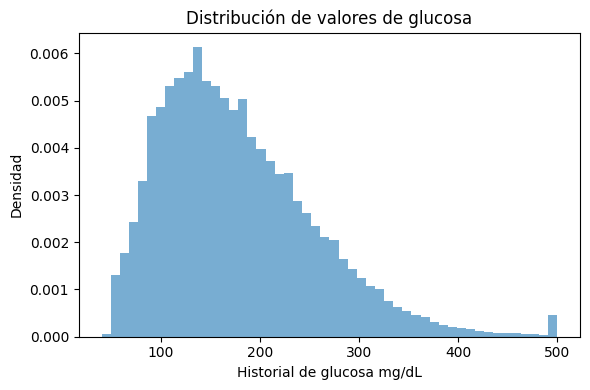

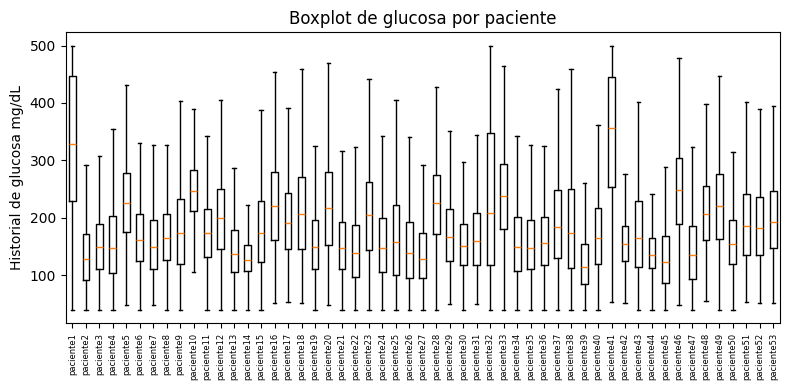

In [126]:
columna_glucosa = 'Historial de glucosa mg/dL'
columna_ts = 'Sello de tiempo del dispositivo'

# Cargamos y unimos todos los valores de glucosa
valores_globales = pd.concat([df[columna_glucosa] for df in datos_pacientes.values()])

# Calculamos y mostramos estadísticas globales y porcentaje de datos faltantes
print("Estadísticos globales de glucosa (mg/dL):")
print(valores_globales.describe().round(2))
print(f"\nPorcentaje de datos faltantes: {valores_globales.isna().mean()*100:.2f}%")

# Visualizamos la distribución de glucosa con histograma
plt.figure(figsize=(6, 4))
plt.hist(valores_globales.dropna(), bins=50, density=True, alpha=0.6)
plt.xlabel(columna_glucosa)
plt.ylabel('Densidad')
plt.title('Distribución de valores de glucosa')
plt.tight_layout()
plt.show()

# Dibujamos un boxplot de glucosa por paciente sin outliers
plt.figure(figsize=(8, 4))
datos_box = [df[columna_glucosa].dropna() for df in datos_pacientes.values()]
plt.boxplot(datos_box, showfliers=False)
plt.xticks(range(1, len(datos_pacientes) + 1), datos_pacientes.keys(), rotation=90, fontsize=6)
plt.ylabel(columna_glucosa)
plt.title('Boxplot de glucosa por paciente')
plt.tight_layout()
plt.show()

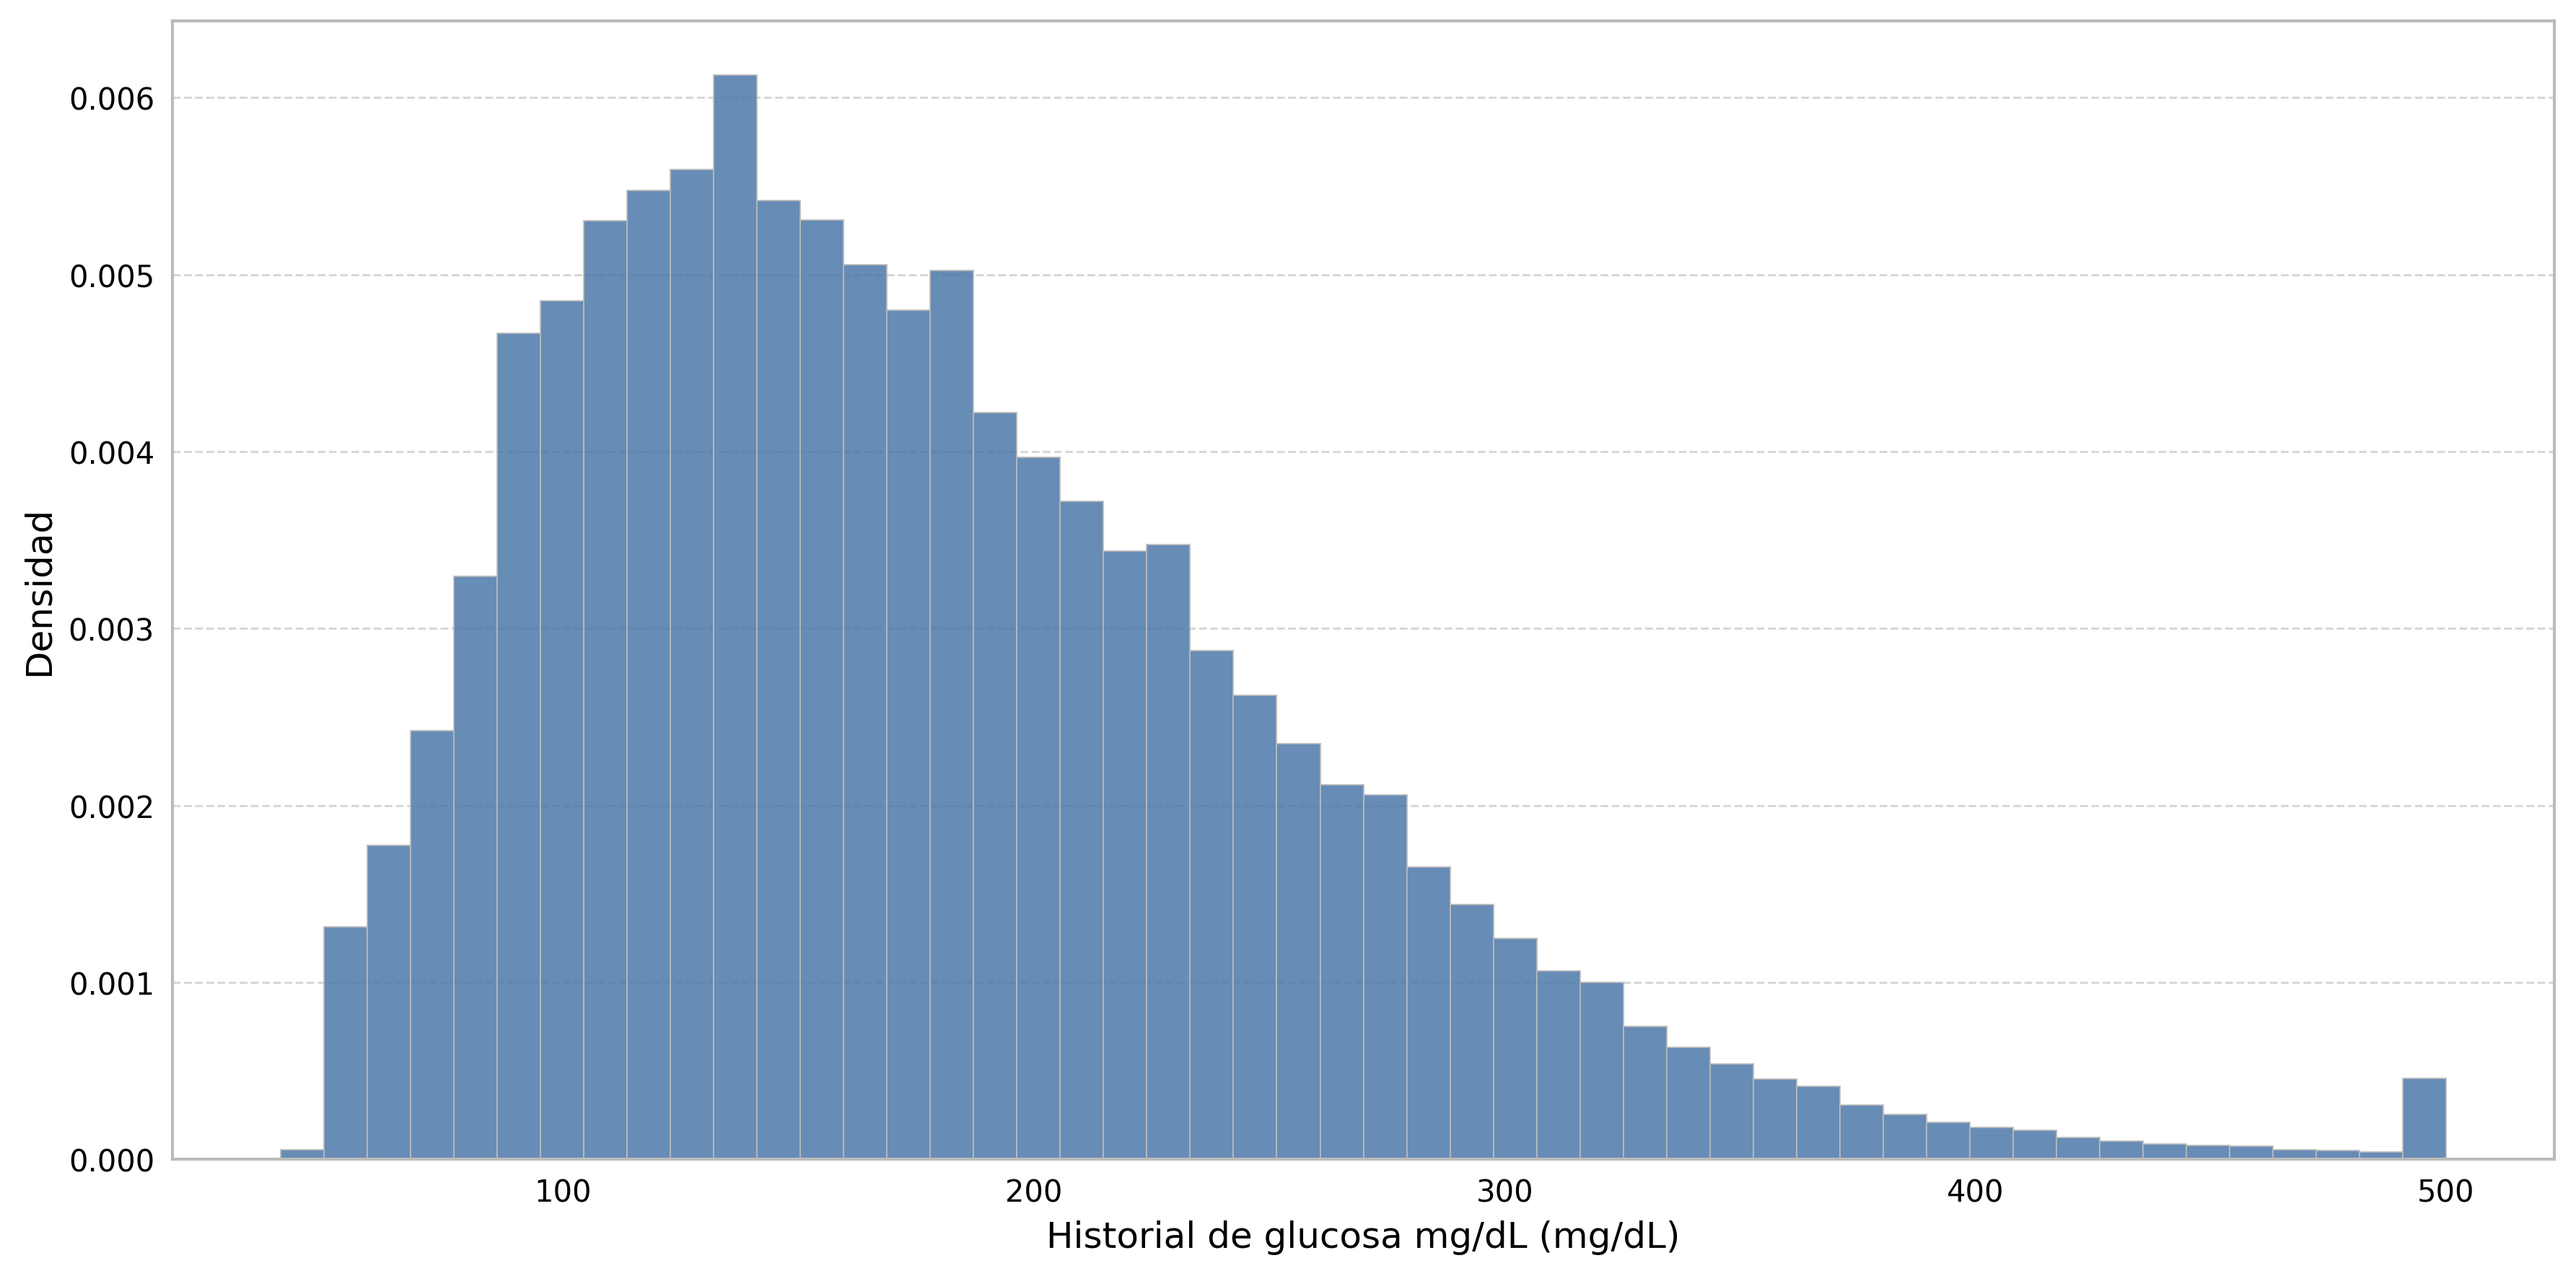

In [127]:
# Definimos color de bordes y cuadrícula
color_bordes = '#BBBBBB'

# Creamos figura y eje con las dimensiones y resolución establecidas
figura, eje = plt.subplots(figsize=(12, 6), dpi=300)

# Configuramos el color y grosor de los spines exteriores
for borde in ['top', 'bottom', 'left', 'right']:
    eje.spines[borde].set_color(color_bordes)
    eje.spines[borde].set_linewidth(1.0)

# Representamos el histograma de densidad manteniendo el estilo acordado
eje.hist(
    valores_globales.dropna(),
    bins=50,
    density=True,
    color='#4C78A8',
    edgecolor=color_bordes,
    linewidth=0.5,
    alpha=0.85
)

# Etiquetamos los ejes
eje.set_xlabel(f'{columna_glucosa} (mg/dL)', fontsize=12)
eje.set_ylabel('Densidad', fontsize=12)

# Eliminamos los guiones de los ticks y ajustamos tamaño y padding
eje.tick_params(axis='both', which='both', length=0)
eje.tick_params(axis='x', labelsize=10, pad=6, rotation=0)
eje.tick_params(axis='y', labelsize=10, pad=6)

# Activamos la cuadrícula horizontal debajo de los datos
eje.yaxis.grid(True, color=color_bordes, linestyle='--', linewidth=0.7, alpha=0.6)
eje.set_axisbelow(True)

# Ajustamos el diseño, guardamos como PDF y mostramos la gráfica
plt.tight_layout()
plt.savefig('histograma_glucosa.pdf')
plt.show()


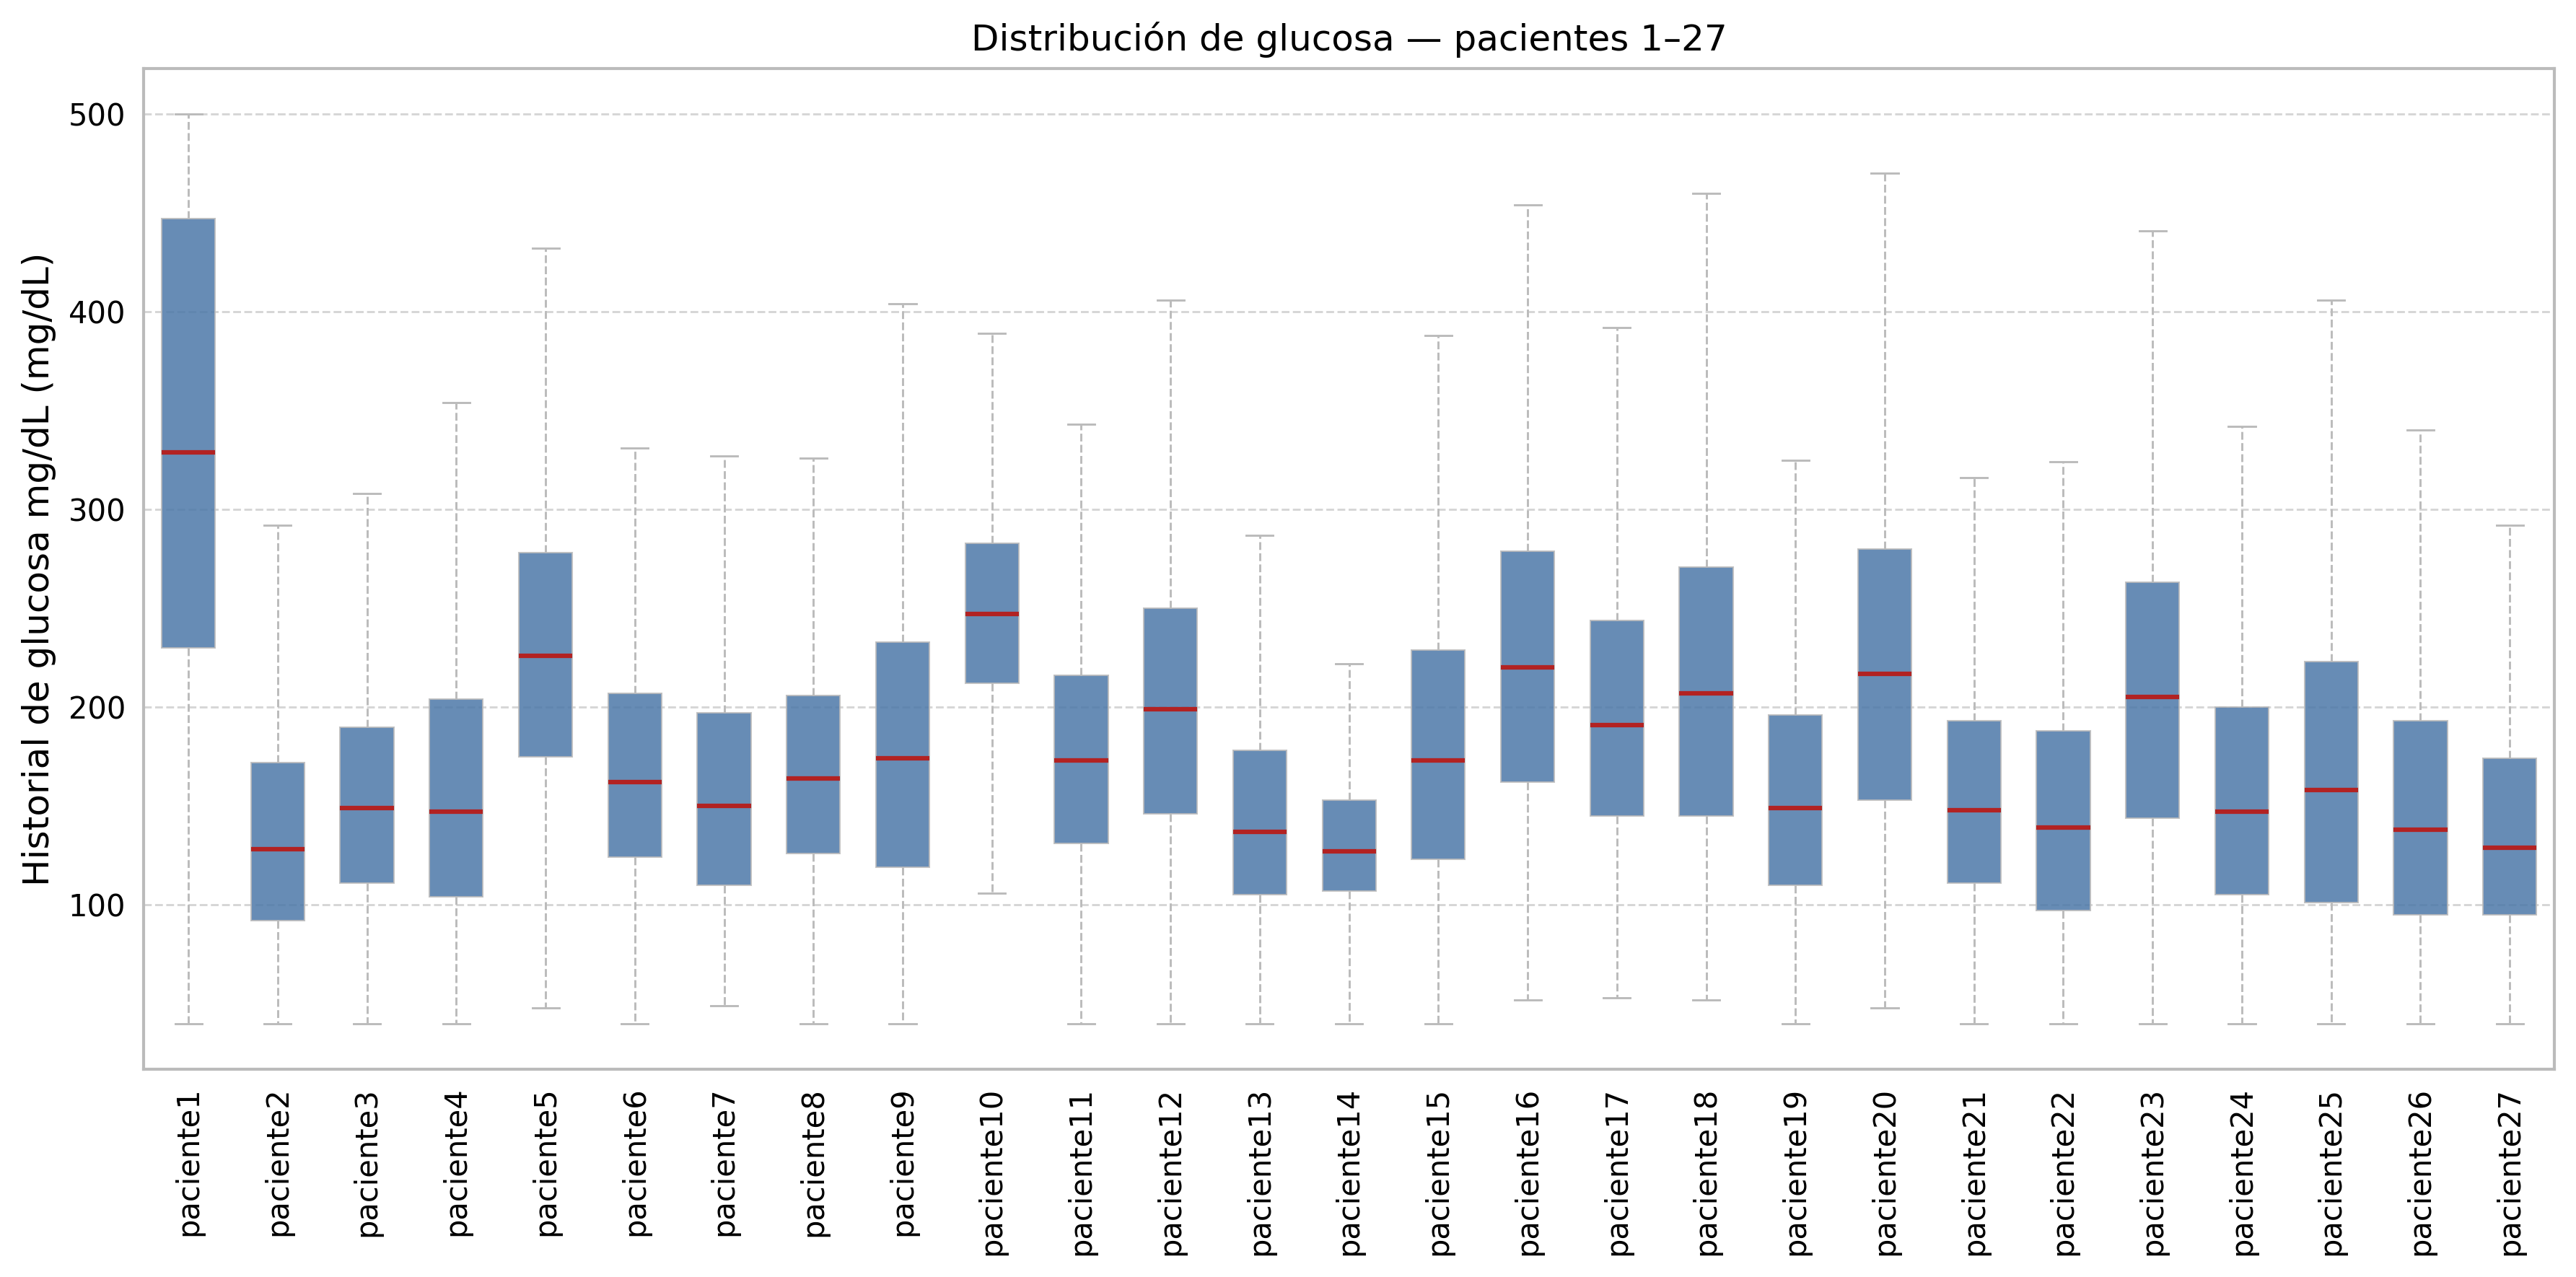

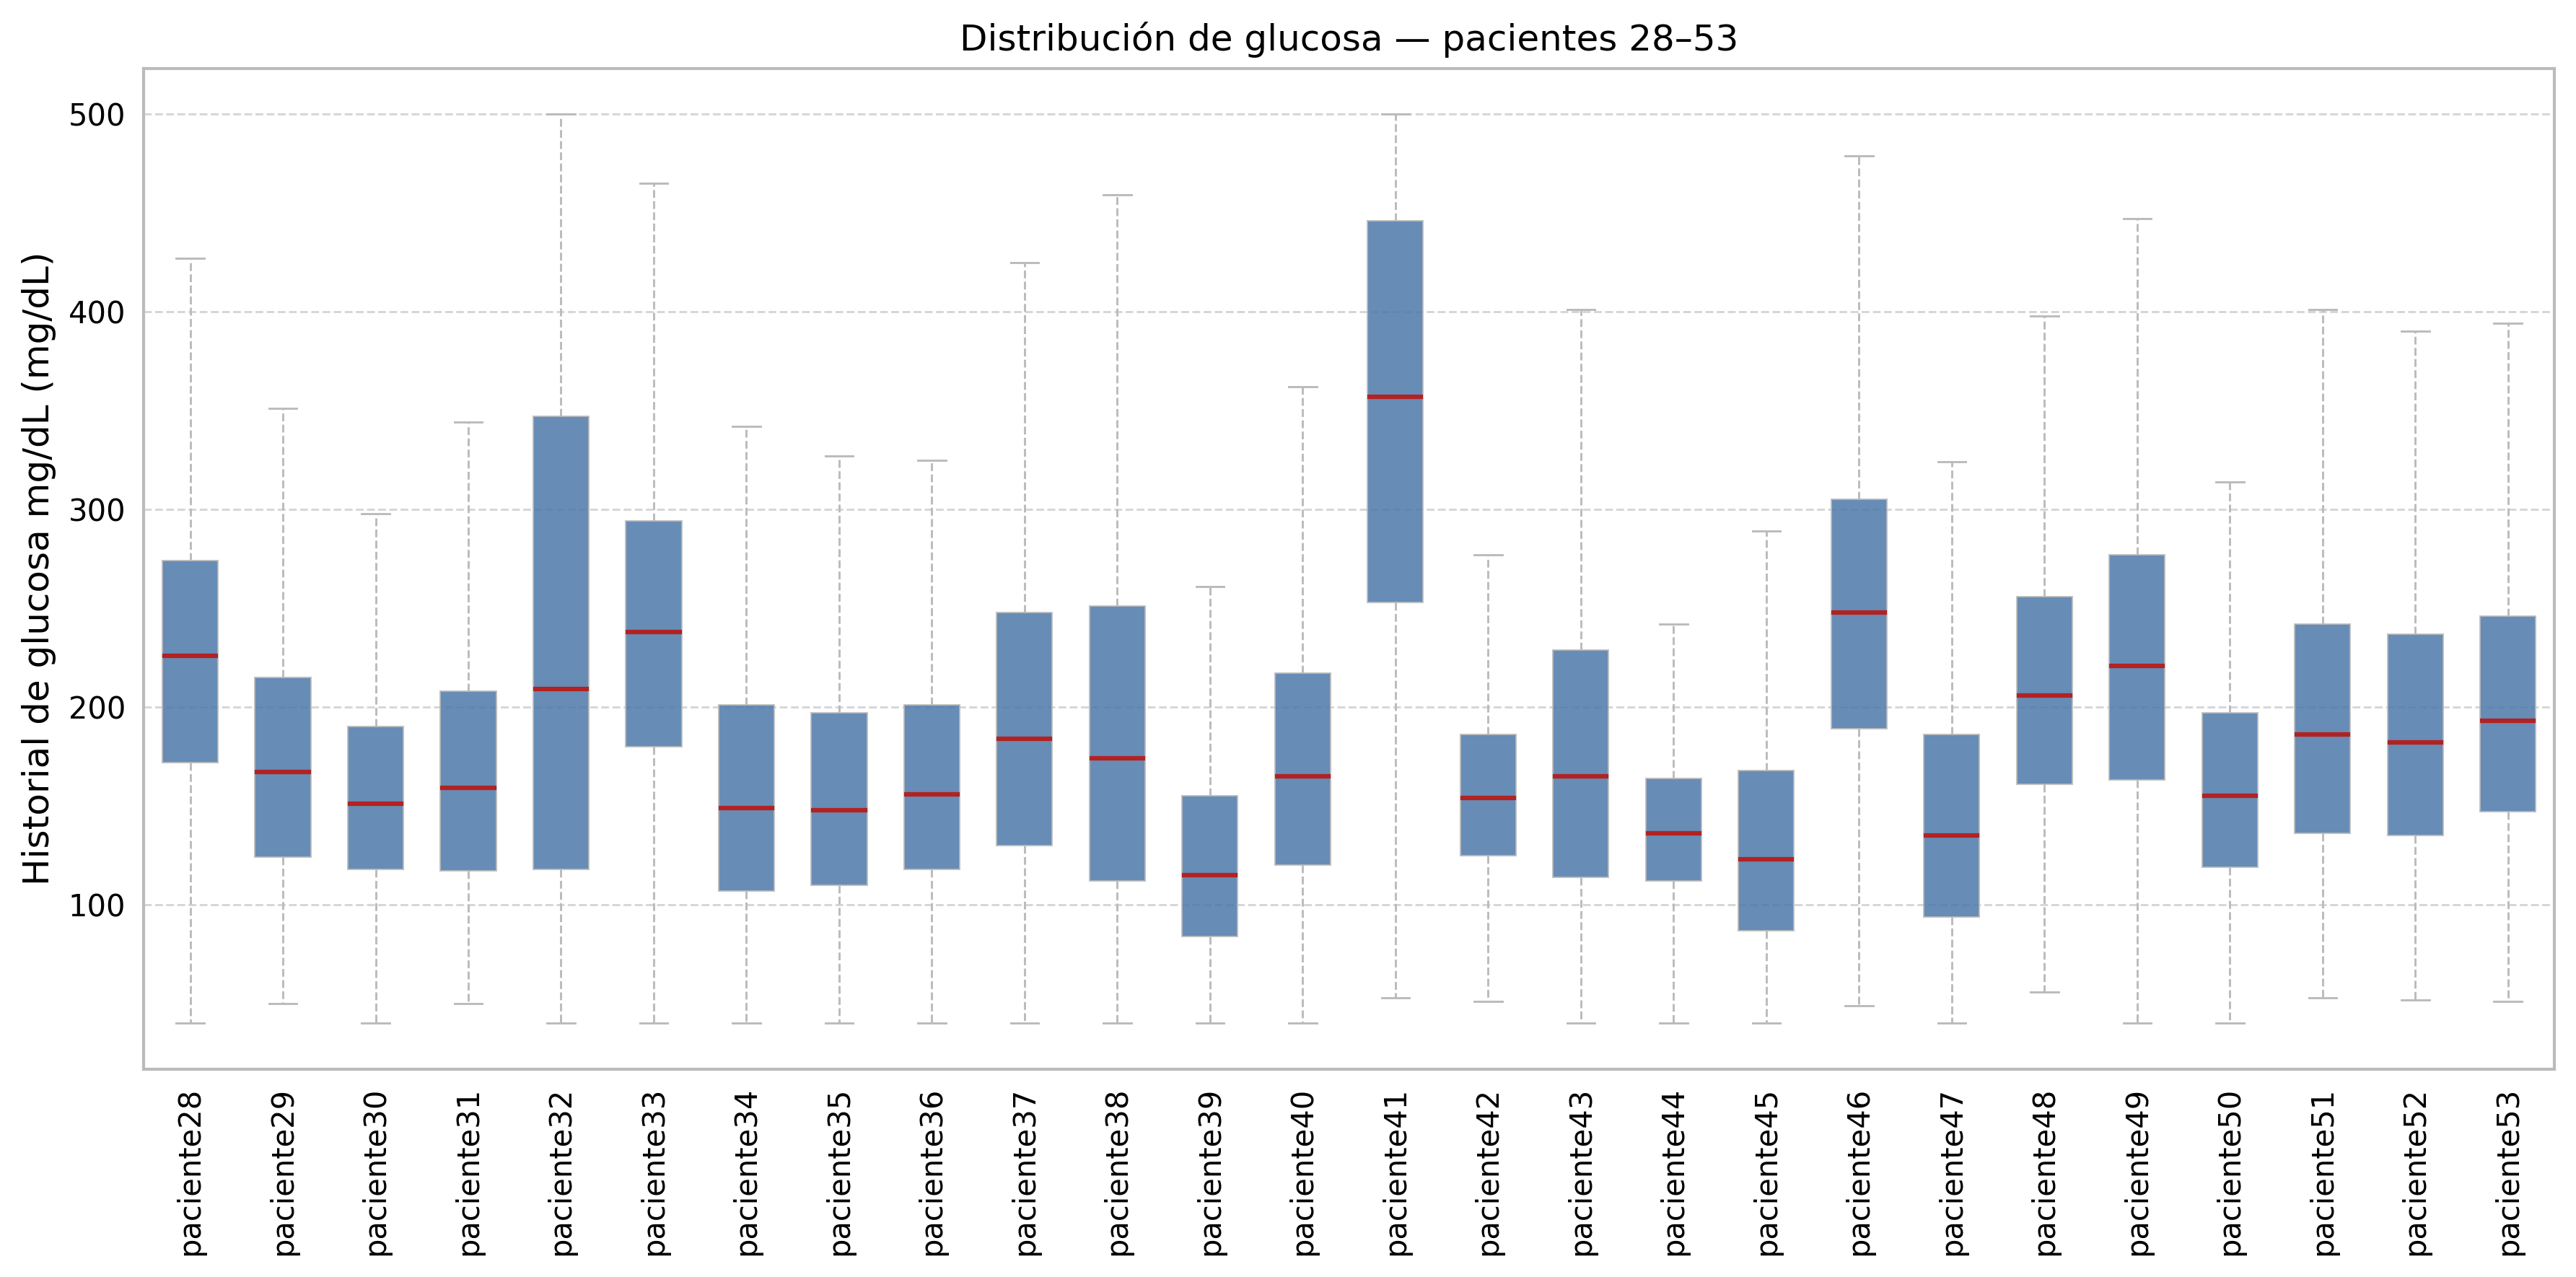

In [128]:
import matplotlib.pyplot as plt

# Definimos la lista de todos los pacientes y la dividimos en dos grupos
pacientes = list(datos_pacientes.keys())
grupo1 = pacientes[:27]
grupo2 = pacientes[27:]

# Definimos la columna de interés y el color de los bordes
columna_glucosa = 'Historial de glucosa mg/dL'
color_bordes = '#BBBBBB'

def generar_boxplot(subset, titulo):
    # Preparamos los datos de glucosa para el subconjunto de pacientes
    datos_subset = [
        datos_pacientes[p][columna_glucosa].dropna()
        for p in subset
    ]
    # Creamos la figura y ajustamos los bordes al estilo acordado
    figura, eje = plt.subplots(figsize=(12, 6), dpi=300)
    for borde in ['top', 'bottom', 'left', 'right']:
        eje.spines[borde].set_color(color_bordes)
        eje.spines[borde].set_linewidth(1.0)
    # Representamos el boxplot sin mostrar outliers
    eje.boxplot(
        datos_subset,
        vert=True,
        widths=0.6,
        patch_artist=True,
        showfliers=False,
        boxprops=dict(facecolor='#4C78A8',
                      edgecolor=color_bordes,
                      linewidth=0.5,
                      alpha=0.85),
        medianprops=dict(color='firebrick', linewidth=1.5),
        whiskerprops=dict(color=color_bordes,
                          linewidth=0.7,
                          linestyle='--'),
        capprops=dict(color=color_bordes, linewidth=0.7)
    )
    # Etiquetamos el eje Y y configuramos las etiquetas del eje X
    eje.set_ylabel(f'{columna_glucosa} (mg/dL)', fontsize=12)
    eje.set_xticks(range(1, len(subset) + 1))
    eje.set_xticklabels(subset, rotation=90, fontsize=10)
    # Eliminamos los guiones de los ticks y ajustamos tamaño y padding de etiquetas
    eje.tick_params(axis='both', which='both', length=0)
    eje.tick_params(axis='x', labelsize=10, pad=6)
    eje.tick_params(axis='y', labelsize=10, pad=6)
    # Activamos la cuadrícula horizontal para facilitar la lectura
    eje.yaxis.grid(True,
                   color=color_bordes,
                   linestyle='--',
                   linewidth=0.7,
                   alpha=0.6)
    eje.set_axisbelow(True)
    # Mostramos el título y presentamos el gráfico por pantalla
    plt.title(titulo)
    plt.tight_layout()
    plt.show()

# Generamos y mostramos los boxplots para los dos grupos de pacientes
generar_boxplot(grupo1, 'Distribución de glucosa — pacientes 1–27')
generar_boxplot(grupo2, 'Distribución de glucosa — pacientes 28–53')
